In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

from figure_labeler import *
from IPython.display import HTML
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')

In [2]:
fl = FigureLabeler();
pd.options.mode.chained_assignment = None

<h1 style="text-align:center;">My Online Friends' Place</h1>
<hr>

<a name="top"></a>
#### Table of Contents:

[ref0]: #introduction
- [Introduction][ref0]

[ref1]: #overview
- [Data Preprocessing][ref1]

[ref2]: #maps
- [Maps][ref2]

    [ref3]: #map1
    - [Bohol][ref3]

    [ref4]: #map2
    - [Bulacan][ref4]

    [ref5]: #map3
    - [Pampanga][ref5]

    [ref6]: #map4
    - [Sorsogon][ref6]

    [ref7]: #map5
    - [Benguet][ref7]

[ref8]: #conclusion
- [Conclusion][ref8]

***

<a name="introduction"></a>
# Introduction
In this section, there will be a brief discussion of the five places chosen for visualization using GeoPandas.
***

In this notebook, five maps will be displayed: Bohol (Region 7), Bulacan and Pampanga (Region 3), Sorsogon (Region 5), and Benguet (Cordillera Administrative Region). GeoPandas will be used to determine which place has the highest *total operating expenses* or expense incurred by a company while doing regular business operations in each location.

[ref]: #top
[Back to Table of Contents][ref]

<a name="overview"></a>
# Data Preprocessing
In this section, the map of the Philippines will be briefly shown, loading the GIDs, listing all the places available for visualizations, along with the dataset containing financial and population data.
***

In [3]:
fl.table_caption("Philippines at Level 0",
                 "Showing GID_0 of the Philippines and describing its shape.")

gdf_0 = gpd.read_file('gadm41_PHL_0.json')
gdf_0.head()

GID_0      COUNTRY                                           geometry
0   PHL  Philippines  MULTIPOLYGON (((119.47060 4.59110, 119.46890 4...

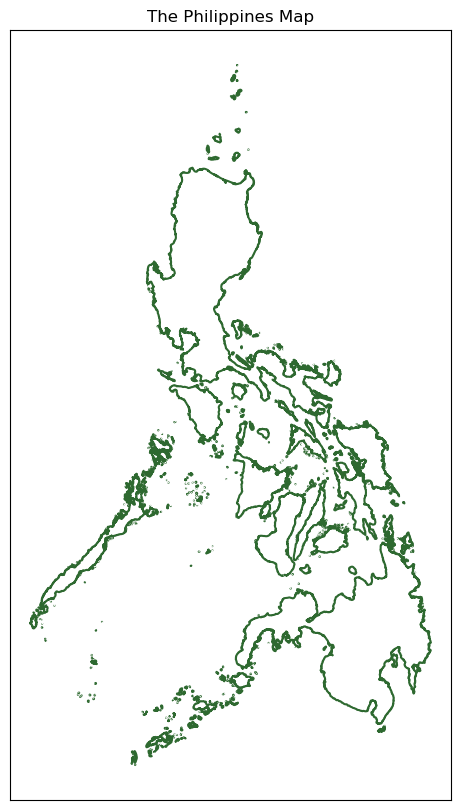

In [4]:
gdf_0.boundary.plot(figsize=(10, 10), color='#2e6930')
plt.xticks([])
plt.yticks([])

plt.title('The Philippines Map');

fl.fig_caption("The Philippines Map",
                 "Displaying the entire country of The Philippines in a single Polygon.")

In [5]:
gdf_2 = gpd.read_file('gadm41_PHL_2.json')

In [6]:
fl.table_caption("Philippines at Level 2",
                 "Displaying GID_2 of the Philippines including its provinces.")

gdf_2.head()

GID_2 GID_0      COUNTRY    GID_1 NAME_1 NL_NAME_1     NAME_2  \
0  PHL.1.1_1   PHL  Philippines  PHL.1_1   Abra        NA    Bangued   
1  PHL.1.2_1   PHL  Philippines  PHL.1_1   Abra        NA    Boliney   
2  PHL.1.3_1   PHL  Philippines  PHL.1_1   Abra        NA      Bucay   
3  PHL.1.4_1   PHL  Philippines  PHL.1_1   Abra        NA     Bucloc   
4  PHL.1.5_1   PHL  Philippines  PHL.1_1   Abra        NA  Daguioman   

  VARNAME_2 NL_NAME_2           TYPE_2     ENGTYPE_2    CC_2    HASC_2  \
0        NA        NA  Bayan|Munisipyo  Municipality  140101  PH.AB.BN   
1        NA        NA  Bayan|Munisipyo  Municipality  140102  PH.AB.BL   
2        NA        NA  Bayan|Munisipyo  Municipality  140103  PH.AB.BU   
3        NA        NA  Bayan|Munisipyo  Municipality  140104  PH.AB.BC   
4        NA        NA  Bayan|Munisipyo  Municipality  140105  PH.AB.DG   

                                            geometry  
0  MULTIPOLYGON (((120.61130 17.49560, 120.60550 ...  
1  MULTIPOLYGON (((120.81400 17.34210, 120.76860 ...  
2  MULTIPOLYGON (((120.67770 17.45740, 120.67320 ...  
3  MULTIPOLYGON (((120.78920 17.44520, 120.88460 ...  
4  MULTIPOLYGON (((120.90750 17.41930, 120.89280 ...

##### <b> List of all place of NAME_1 for reference:

In [7]:
unique_names = gdf_2['NAME_1'].unique()
print(unique_names)

['Abra' 'AgusandelNorte' 'AgusandelSur' 'Aklan' 'Albay' 'Antique' 'Apayao'
 'Aurora' 'Basilan' 'Bataan' 'Batanes' 'Batangas' 'Benguet' 'Biliran'
 'Bohol' 'Bukidnon' 'Bulacan' 'Cagayan' 'CamarinesNorte' 'CamarinesSur'
 'Camiguin' 'Capiz' 'Catanduanes' 'Cavite' 'Cebu' 'CompostelaValley'
 'DavaodelNorte' 'DavaodelSur' 'DavaoOriental' 'DinagatIslands'
 'EasternSamar' 'Guimaras' 'Ifugao' 'IlocosNorte' 'IlocosSur' 'Iloilo'
 'Isabela' 'Kalinga' 'LaUnion' 'Laguna' 'LanaodelNorte' 'LanaodelSur'
 'Leyte' 'Maguindanao' 'Marinduque' 'Masbate' 'MetropolitanManila'
 'MisamisOccidental' 'MisamisOriental' 'MountainProvince'
 'NegrosOccidental' 'NegrosOriental' 'NorthCotabato' 'NorthernSamar'
 'NuevaEcija' 'NuevaVizcaya' 'OccidentalMindoro' 'OrientalMindoro'
 'Palawan' 'Pampanga' 'Pangasinan' 'Quezon' 'Quirino' 'Rizal' 'Romblon'
 'Samar' 'Sarangani' 'Siquijor' 'Sorsogon' 'SouthCotabato' 'SouthernLeyte'
 'SultanKudarat' 'Sulu' 'SurigaodelNorte' 'SurigaodelSur' 'Tarlac'
 'Tawi-Tawi' 'Zambales' 'Zamboanga

In [8]:
gdf_3 = gpd.read_file('gadm41_PHL_3.json')

In [9]:
fl.table_caption("Philippines at Level 3",
                 "Displaying GID_3 of the provinces of the Philippines, along with their municipalities and cities.")

gdf_3.head()

GID_3 GID_0      COUNTRY    GID_1 NAME_1 NL_NAME_1      GID_2  \
0  PHL.1.1.1_1   PHL  Philippines  PHL.1_1   Abra        NA  PHL.1.1_1   
1  PHL.1.1.2_1   PHL  Philippines  PHL.1_1   Abra        NA  PHL.1.1_1   
2  PHL.1.1.3_1   PHL  Philippines  PHL.1_1   Abra        NA  PHL.1.1_1   
3  PHL.1.1.4_1   PHL  Philippines  PHL.1_1   Abra        NA  PHL.1.1_1   
4  PHL.1.1.5_1   PHL  Philippines  PHL.1_1   Abra        NA  PHL.1.1_1   

    NAME_2 NL_NAME_2      NAME_3 VARNAME_3 NL_NAME_3    TYPE_3 ENGTYPE_3 CC_3  \
0  Bangued        NA    Agtangao        NA        NA  Barangay   Village   NA   
1  Bangued        NA       Angad        NA        NA  Barangay   Village   NA   
2  Bangued        NA     Bañacao        NA        NA  Barangay   Village   NA   
3  Bangued        NA  Bangbangar        NA        NA  Barangay   Village   NA   
4  Bangued        NA    Cabuloan        NA        NA  Barangay   Village   NA   

  HASC_3                                           geometry  
0     NA  MULTIPOLYGON (((120.62390 17.57300, 120.63430 ...  
1     NA  MULTIPOLYGON (((120.63430 17.58040, 120.62530 ...  
2     NA  MULTIPOLYGON (((120.59630 17.61630, 120.59570 ...  
3     NA  MULTIPOLYGON (((120.59570 17.60570, 120.59630 ...  
4     NA  MULTIPOLYGON (((120.58300 17.59960, 120.59570 ...

In [10]:
fl.table_caption("Financial and Population",
                 "Showing the Sample Dataset of Financial and Population.")

finpop = pd.read_csv("financial_pop.csv")
finpop.head()

pop  tot_local_sources  tot_tax_revenue  tot_current_oper_income  \
0  48163.0          74.045920        36.556294               230.577076   
1   3573.0           0.115667         0.035633                56.689883   
2  17115.0           1.736411         1.019565                93.647242   
3   2501.0           0.273689         0.129150                44.789104   
4   2088.0           0.643801         0.277660                51.242322   

   total_oper_expenses  net_oper_income  total_non_income_receipts  \
0           206.848717        23.728359                        0.0   
1            54.409910         2.279973                        0.0   
2            66.222389        27.424853                        0.0   
3            29.633181        15.155923                        0.0   
4            47.848486         3.393836                        0.0   

   capital_expenditure  total_non_oper_expenditures  cash_balance_end  \
0            16.202464                    21.181116         15.758681   
1             0.000000                     0.030000         20.369743   
2            19.560034                    20.792182          6.632671   
3             0.479569                     0.656569         24.348356   
4             0.000000                     0.000000          6.511575   

  shp_province shp_municipality  
0         Abra          Bangued  
1         Abra          Boliney  
2         Abra            Bucay  
3         Abra           Bucloc  
4         Abra        Daguioman

[ref]: #top
[Back to Table of Contents][ref]

<a name="maps"></a>
# Maps
This section will provide visualizations for the five chosen places: [Bohol](#map1), [Bulacan](#map2), [Pampanga](#map3), [Sorsogon](#map4), and [Benguet](#map5), along with their respective highest total operating expenses.
***

<a name="map1"></a>
## <span style="color:#152237;">Bohol</span>
This section will provide visualizations of Bohol and identify the place with the highest total operating expenses.


In [11]:
fl.table_caption("Bohol (Region VII)",
                 "Showing overview of the level 2 content of Bohol.")

gdf2_R7 = gdf_2[gdf_2['NAME_1'] == 'Bohol']
gdf2_R7.head()

GID_2 GID_0      COUNTRY     GID_1 NAME_1 NL_NAME_1       NAME_2  \
209  PHL.15.1_1   PHL  Philippines  PHL.15_1  Bohol        NA  Albuquerque   
210  PHL.15.2_1   PHL  Philippines  PHL.15_1  Bohol        NA       Alicia   
211  PHL.15.3_1   PHL  Philippines  PHL.15_1  Bohol        NA         Anda   
212  PHL.15.4_1   PHL  Philippines  PHL.15_1  Bohol        NA    Antequera   
213  PHL.15.5_1   PHL  Philippines  PHL.15_1  Bohol        NA     Baclayon   

        VARNAME_2 NL_NAME_2           TYPE_2     ENGTYPE_2   CC_2    HASC_2  \
209  Alburquerque        NA  Bayan|Munisipyo  Municipality  71201  PH.BO.AB   
210            NA        NA  Bayan|Munisipyo  Municipality  71202  PH.BO.AI   
211            NA        NA  Bayan|Munisipyo  Municipality  71203  PH.BO.AD   
212            NA        NA  Bayan|Munisipyo  Municipality  71204  PH.BO.AT   
213            NA        NA  Bayan|Munisipyo  Municipality  71205  PH.BO.BC   

                                              geometry  
209  MULTIPOLYGON (((123.95390 9.60760, 123.94580 9...  
210  MULTIPOLYGON (((124.40900 9.84630, 124.40580 9...  
211  MULTIPOLYGON (((124.54820 9.72860, 124.52730 9...  
212  MULTIPOLYGON (((123.91040 9.74360, 123.90580 9...  
213  MULTIPOLYGON (((123.92030 9.48750, 123.91830 9...

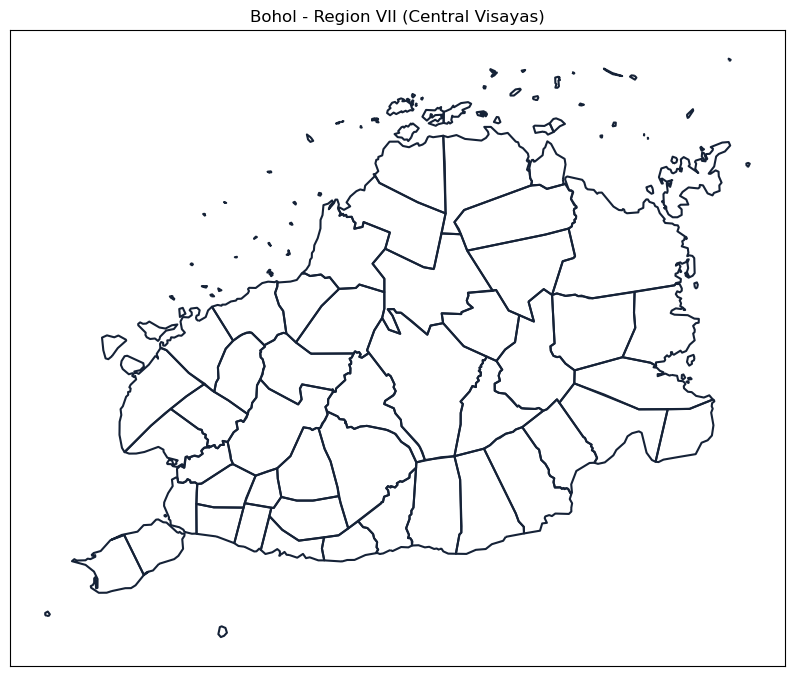

In [12]:
gdf2_R7.boundary.plot(figsize=(10,10), color='#152237')

plt.xticks([])
plt.yticks([])

plt.title('Bohol - Region VII (Central Visayas)');

fl.fig_caption("Bohol",
                "Level 2 Map of Bohol, Central Visayas (Region 7).")

In [13]:
finpop_R7 = finpop[finpop['shp_province'] == 'Bohol']

In [14]:
capex_muni = finpop_R7.sort_values(by="total_oper_expenses", ascending=False)

capex_muni.set_index('shp_municipality', inplace=True)

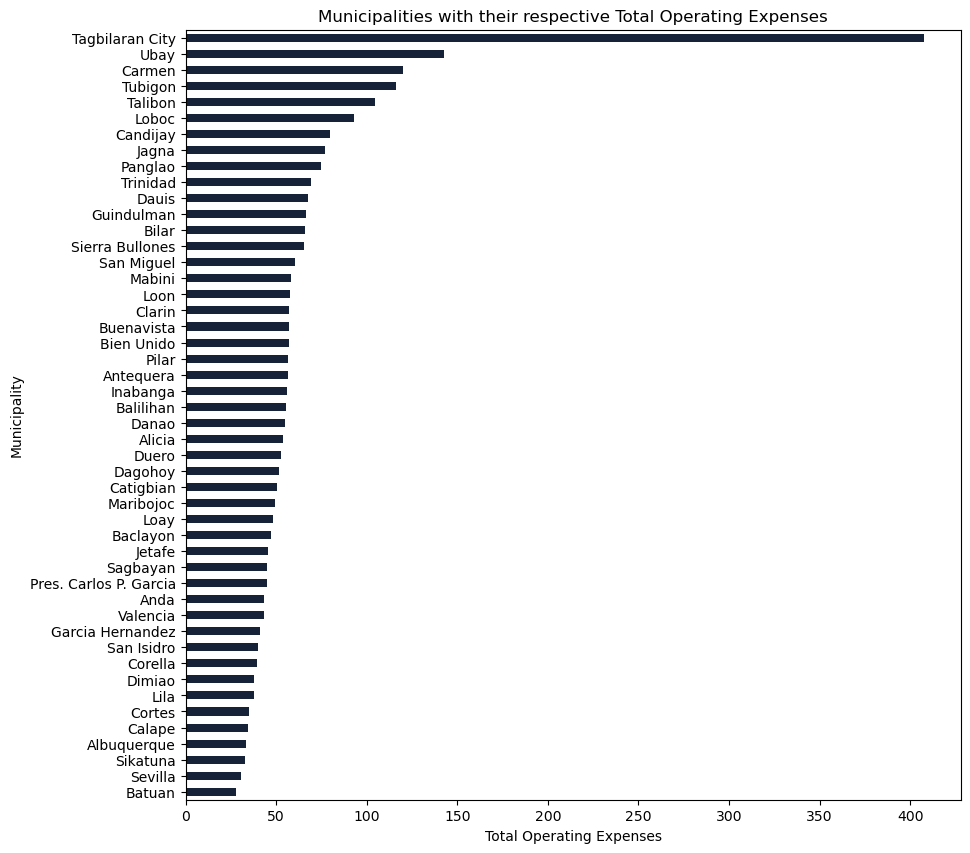

In [15]:
plt.figure(figsize=(10,10))
capex_muni['total_oper_expenses'].plot(kind='barh', color='#152237')
plt.title("Municipalities with their respective Total Operating Expenses")
plt.xlabel('Total Operating Expenses')
plt.ylabel('Municipality')
plt.gca().invert_yaxis()
plt.show()

fl.fig_caption("Municipalities of Bohol",
                "The total operating expenses of Bohol, including Tagbilaran City, with the highest count.")

In [16]:
R7_data = gdf2_R7.merge(finpop_R7, left_on = ['NAME_2'], right_on = ['shp_municipality'])

In [17]:
gdf2_R7.shape[0] == finpop_R7.shape[0]

True

In [18]:
gdf2_R7.shape[0] == R7_data.shape[0]

False

In [19]:
finpop_R7_clean = finpop_R7.copy()

finpop_R7_clean['shp_municipality'] = finpop_R7_clean['shp_municipality'].str.replace(' ', '')

In [20]:
R7_data_clean = gdf2_R7.merge(finpop_R7_clean, left_on = ['NAME_2'], right_on = ['shp_municipality'])

In [21]:
gdf2_R7.shape[0] == R7_data_clean.shape[0]

True

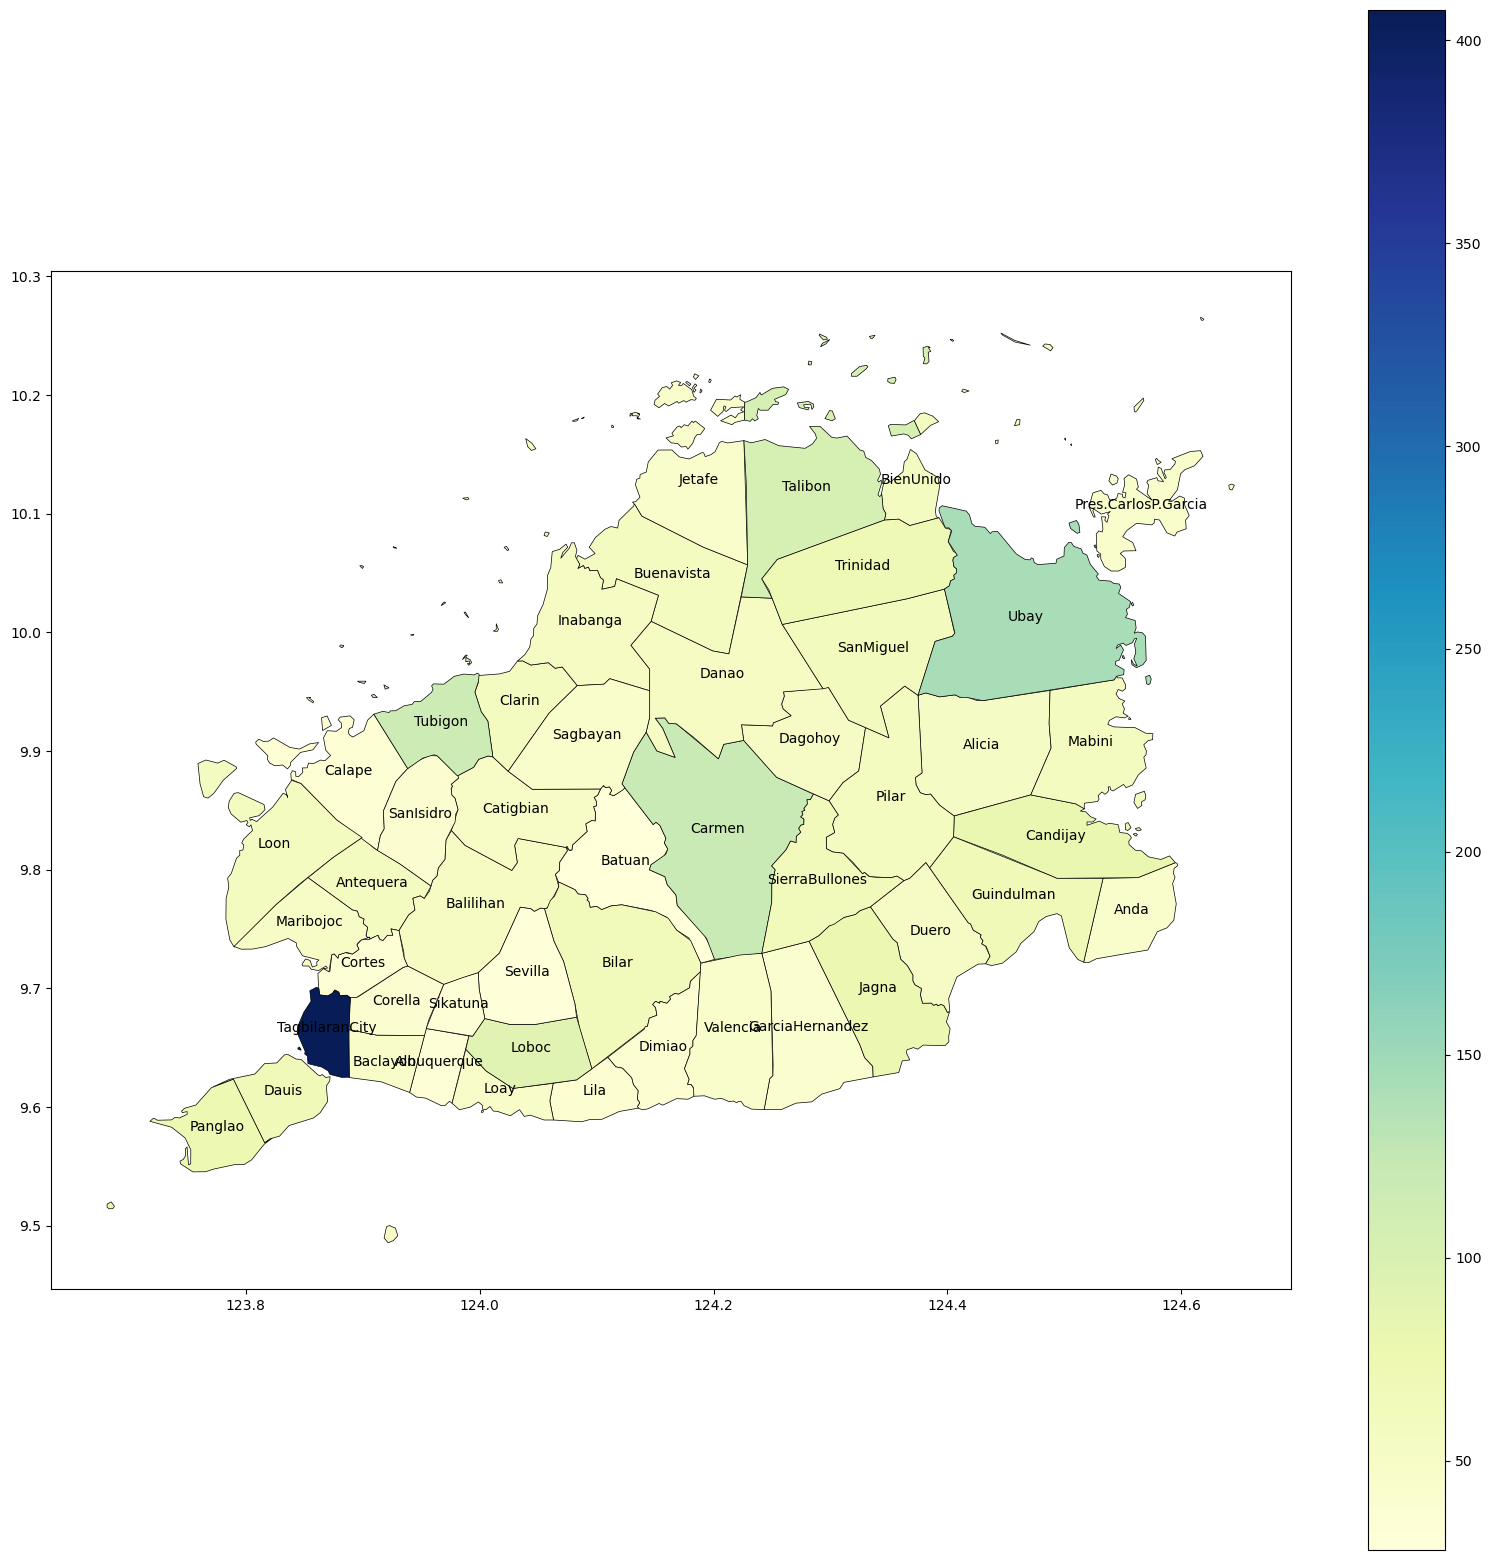

In [22]:
ax = R7_data_clean.plot(column='total_oper_expenses',
                         figsize=(20,20),
                         cmap='YlGnBu',
                         legend=True,
                         edgecolor='black',
                         linewidth=0.5);
ax.grid(False)

for idx, row in R7_data_clean.iterrows():
    ax.annotate(text=row['shp_municipality'], xy=row['geometry'].centroid.coords[0],
                horizontalalignment='center', color='black')
    
fl.fig_caption("Bohol and its TOE",
                "Displaying the places in Bohol along with their corresponding levels of total operating expenditure.")

In [23]:
fl.table_caption("Tagbilaran City",
                 "Tagbilaran City of Bohol (Region VII) with the highest total operating expenses.")

gdf3_R7 = gdf_3[gdf_3['NAME_2'] == 'TagbilaranCity']
gdf3_R7.head()

GID_3 GID_0      COUNTRY     GID_1 NAME_1 NL_NAME_1  \
5722  PHL.15.43.1_1   PHL  Philippines  PHL.15_1  Bohol        NA   
5723  PHL.15.43.2_1   PHL  Philippines  PHL.15_1  Bohol        NA   
5724  PHL.15.43.3_1   PHL  Philippines  PHL.15_1  Bohol        NA   
5725  PHL.15.43.4_1   PHL  Philippines  PHL.15_1  Bohol        NA   
5726  PHL.15.43.5_1   PHL  Philippines  PHL.15_1  Bohol        NA   

            GID_2          NAME_2 NL_NAME_2   NAME_3 VARNAME_3 NL_NAME_3  \
5722  PHL.15.43_1  TagbilaranCity        NA     Bool        NA        NA   
5723  PHL.15.43_1  TagbilaranCity        NA     Booy        NA        NA   
5724  PHL.15.43_1  TagbilaranCity        NA  Cabawan        NA        NA   
5725  PHL.15.43_1  TagbilaranCity        NA    Cogon        NA        NA   
5726  PHL.15.43_1  TagbilaranCity        NA   Dampas        NA        NA   

        TYPE_3 ENGTYPE_3 CC_3 HASC_3  \
5722  Barangay   Village   NA     NA   
5723  Barangay   Village   NA     NA   
5724  Barangay   Village   NA     NA   
5725  Barangay   Village   NA     NA   
5726  Barangay   Village   NA     NA   

                                               geometry  
5722  MULTIPOLYGON (((123.88810 9.65160, 123.88860 9...  
5723  MULTIPOLYGON (((123.84430 9.66750, 123.85960 9...  
5724  MULTIPOLYGON (((123.88950 9.69220, 123.88850 9...  
5725  MULTIPOLYGON (((123.84610 9.64940, 123.84750 9...  
5726  MULTIPOLYGON (((123.88810 9.66140, 123.88810 9...

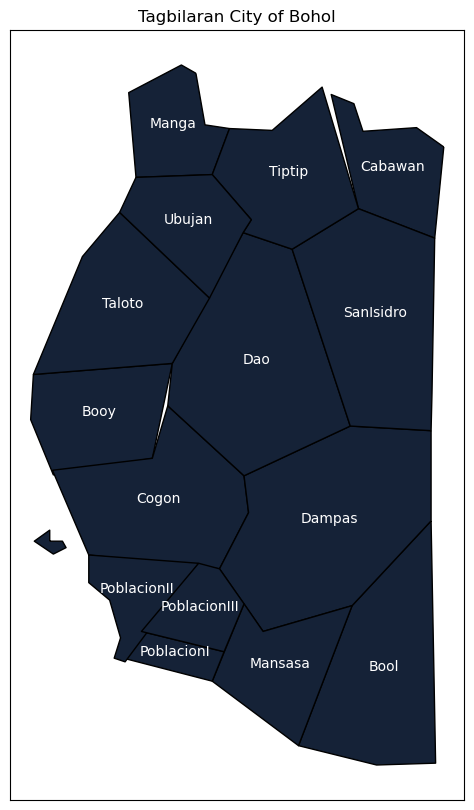

In [24]:
gdf3_R7.plot(figsize=(10,10), color='#152237', edgecolor='black')

for index, row in gdf3_R7.iterrows():
    plt.annotate(text=row['NAME_3'], xy=row['geometry'].centroid.coords[0],
                horizontalalignment='center', color='white')
                 
plt.xticks([])
plt.yticks([])

plt.title('Tagbilaran City of Bohol');

fl.fig_caption("Tagbilaran City",
                "Tagbilaran City with its municipalities and cities.")

**In Bohol, it can be conclude that Tagbilaran City has the highest total operating expenses and Batuan has the lowest.**

<a name="map2"></a>
## <span style="color:#6d5501;">Bulacan</span>
This section will provide visualizations of Bulacan and identify the place with the highest total operating expenses.


In [25]:
fl.table_caption("Bulacan (Region III)",
                 "Showing overview of the level 2 content of Bulacan.")

gdf2_R3 = gdf_2[gdf_2['NAME_1'] == 'Bulacan']
gdf2_R3.head()

GID_2 GID_0      COUNTRY     GID_1   NAME_1 NL_NAME_1    NAME_2  \
279  PHL.17.1_1   PHL  Philippines  PHL.17_1  Bulacan        NA     Angat   
280  PHL.17.2_1   PHL  Philippines  PHL.17_1  Bulacan        NA  Balagtas   
281  PHL.17.3_1   PHL  Philippines  PHL.17_1  Bulacan        NA   Baliuag   
282  PHL.17.4_1   PHL  Philippines  PHL.17_1  Bulacan        NA    Bocaue   
283  PHL.17.5_1   PHL  Philippines  PHL.17_1  Bulacan        NA   Bulacan   

    VARNAME_2 NL_NAME_2           TYPE_2     ENGTYPE_2   CC_2    HASC_2  \
279        NA        NA  Bayan|Munisipyo  Municipality  31401  PH.BU.AG   
280     Bigaa        NA  Bayan|Munisipyo  Municipality  31402  PH.BU.BA   
281        NA        NA  Bayan|Munisipyo  Municipality  31403  PH.BU.BG   
282        NA        NA  Bayan|Munisipyo  Municipality  31404  PH.BU.BC   
283        NA        NA  Bayan|Munisipyo  Municipality  31405  PH.BU.BL   

                                              geometry  
279  MULTIPOLYGON (((121.08390 14.94410, 121.08700 ...  
280  MULTIPOLYGON (((120.91170 14.79580, 120.90940 ...  
281  MULTIPOLYGON (((120.91000 14.91790, 120.91130 ...  
282  MULTIPOLYGON (((120.96760 14.78840, 120.97460 ...  
283  MULTIPOLYGON (((120.90000 14.71470, 120.90330 ...

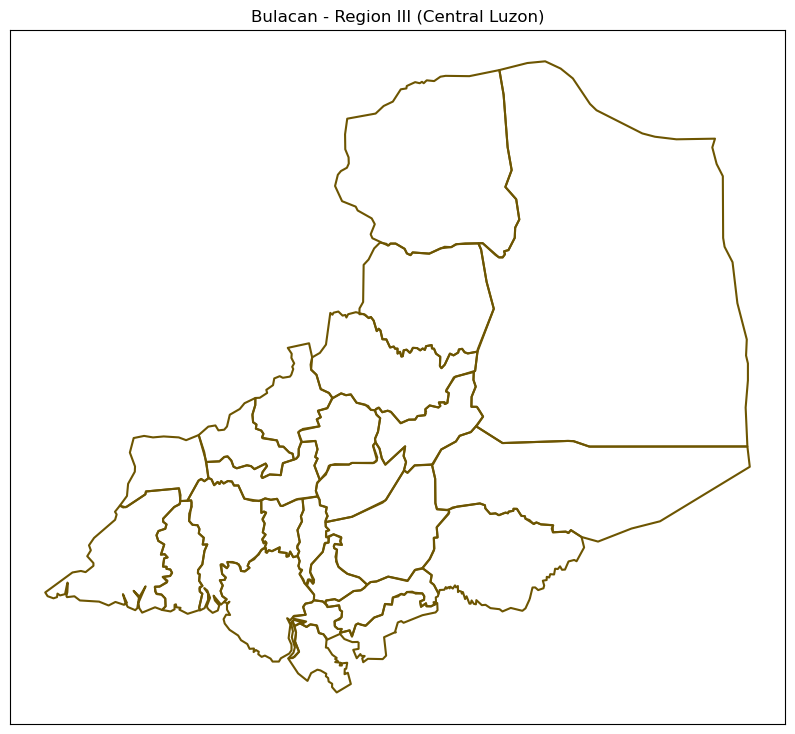

In [26]:
gdf2_R3.boundary.plot(figsize=(10,10), color='#6d5501')

plt.xticks([])
plt.yticks([])

plt.title('Bulacan - Region III (Central Luzon)');

fl.fig_caption("Bulacan",
                "Level 2 Map of Bulacan, Central Luzon (Region 3).")

In [27]:
finpop_R3 = finpop[finpop['shp_province'] == 'Bulacan']

In [28]:
capex_muni = finpop_R3.sort_values(by="total_oper_expenses", ascending=False)

capex_muni.set_index('shp_municipality', inplace=True)

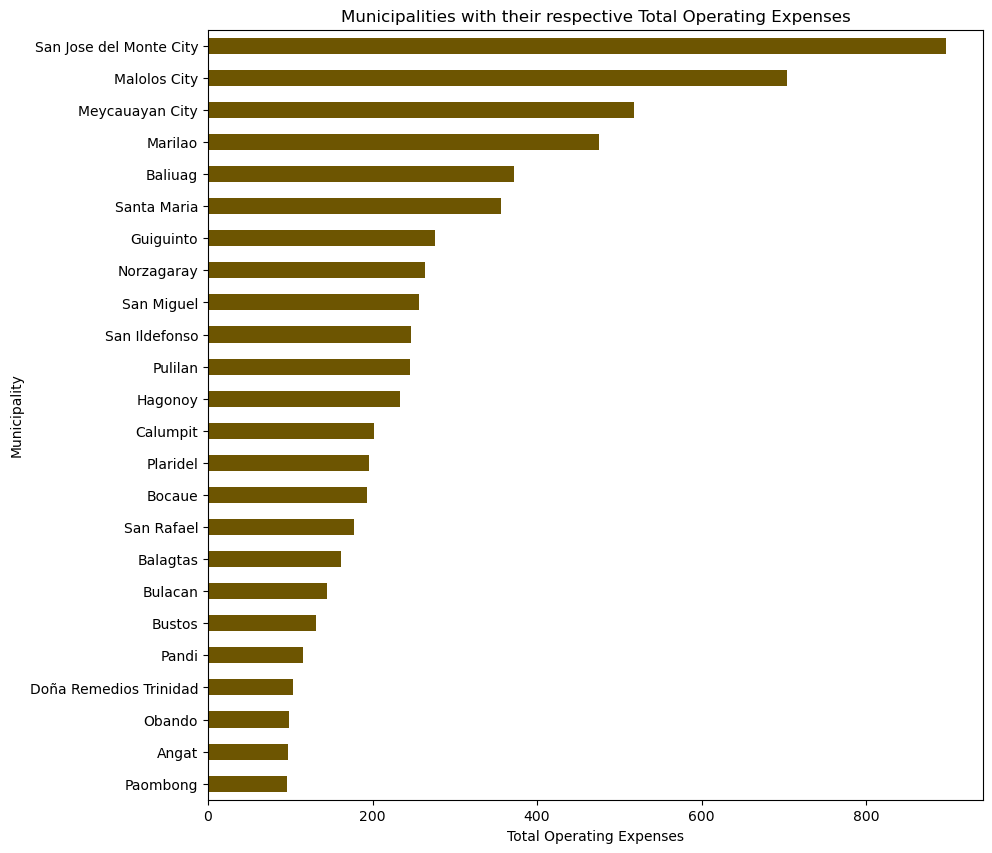

In [29]:
plt.figure(figsize=(10,10))
capex_muni['total_oper_expenses'].plot(kind='barh', color='#6d5501')
plt.title("Municipalities with their respective Total Operating Expenses")
plt.xlabel('Total Operating Expenses')
plt.ylabel('Municipality')
plt.gca().invert_yaxis()
plt.show()

fl.fig_caption("Municipalities of Bulacan",
                "The total operating expenses of Bulacan, including San Jose del Monte City, with the highest count.")

In [30]:
R3_data = gdf2_R3.merge(finpop_R3, left_on = ['NAME_2'], right_on = ['shp_municipality'])

In [31]:
gdf2_R3.shape[0] == finpop_R3.shape[0]

True

In [32]:
gdf2_R3.shape[0] == R3_data.shape[0]

False

In [33]:
finpop_R3_clean = finpop_R3.copy()

finpop_R3_clean['shp_municipality'] = finpop_R3_clean['shp_municipality'].str.replace(' ', '')

In [34]:
R3_data_clean = gdf2_R3.merge(finpop_R3_clean, left_on = ['NAME_2'], right_on = ['shp_municipality'])

In [35]:
gdf2_R3.shape[0] == R3_data_clean.shape[0]

True

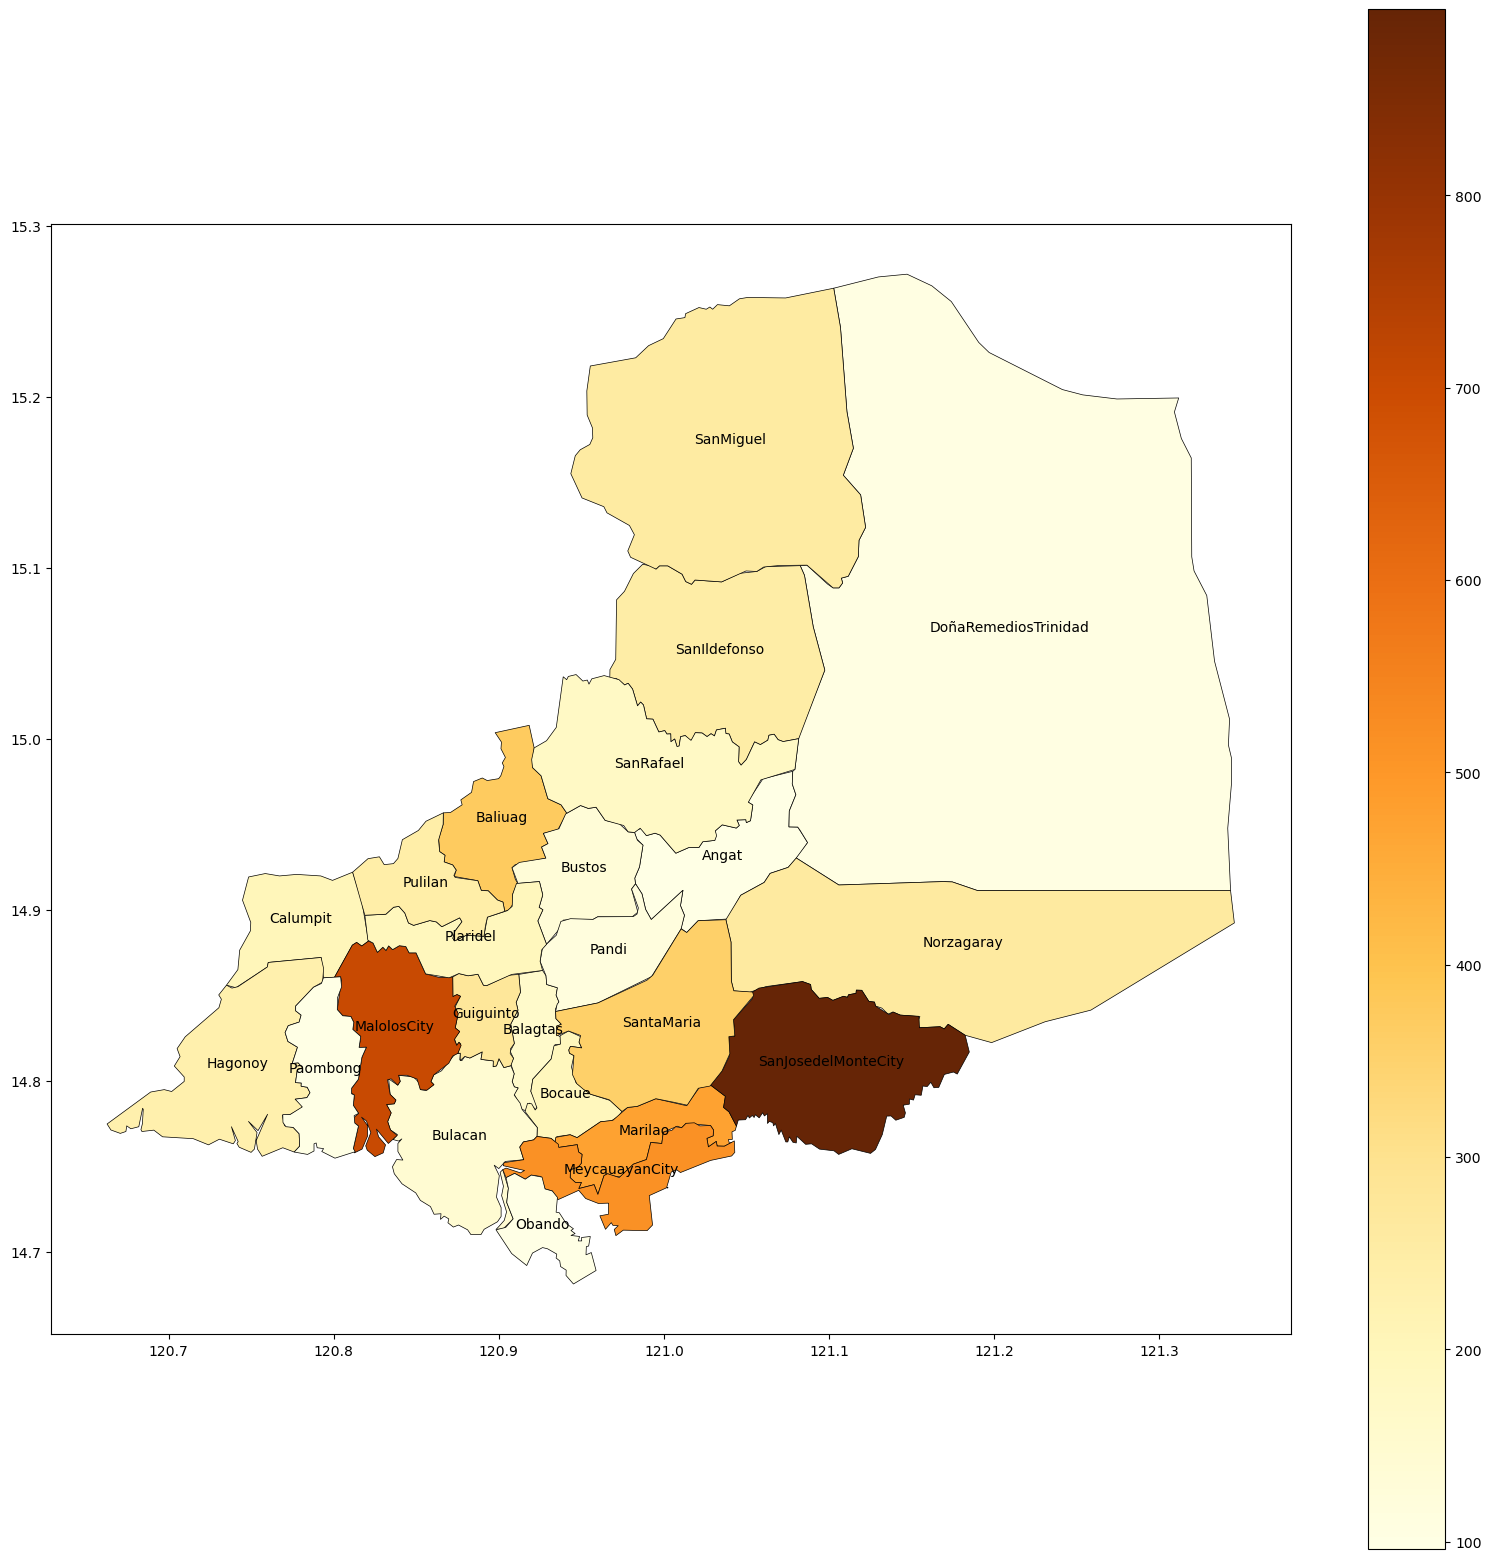

In [36]:
ax = R3_data_clean.plot(column='total_oper_expenses',
                         figsize=(20,20),
                         cmap='YlOrBr',
                         legend=True,
                         edgecolor='black',
                         linewidth=0.5);

ax.grid(False)

for idx, row in R3_data_clean.iterrows():
    ax.annotate(text=row['shp_municipality'], xy=row['geometry'].centroid.coords[0],
                horizontalalignment='center', color='black')
    
fl.fig_caption("Bulacan and its TOE",
                "Displaying the places in Bulacan along with their corresponding levels of total operating expenditure.")

In [37]:
fl.table_caption("San Jose del Monte City",
                 "San Jose del Monte City of Bulacan (Region III) with the highest total operating expenses.")

gdf3_R3 = gdf_3[gdf_3['NAME_2'] == 'SanJosedelMonteCity']
gdf3_R3.head()

GID_3 GID_0      COUNTRY     GID_1   NAME_1 NL_NAME_1  \
6759  PHL.17.21.1_1   PHL  Philippines  PHL.17_1  Bulacan        NA   
6760  PHL.17.21.2_1   PHL  Philippines  PHL.17_1  Bulacan        NA   
6761  PHL.17.21.3_1   PHL  Philippines  PHL.17_1  Bulacan        NA   
6762  PHL.17.21.4_1   PHL  Philippines  PHL.17_1  Bulacan        NA   
6763  PHL.17.21.5_1   PHL  Philippines  PHL.17_1  Bulacan        NA   

            GID_2               NAME_2 NL_NAME_2          NAME_3 VARNAME_3  \
6759  PHL.17.21_1  SanJosedelMonteCity        NA      Assumption        NA   
6760  PHL.17.21_1  SanJosedelMonteCity        NA     BagongBuhay        NA   
6761  PHL.17.21_1  SanJosedelMonteCity        NA   BagongBuhayII        NA   
6762  PHL.17.21_1  SanJosedelMonteCity        NA  BagongBuhayIII        NA   
6763  PHL.17.21_1  SanJosedelMonteCity        NA          Citrus        NA   

     NL_NAME_3    TYPE_3 ENGTYPE_3 CC_3 HASC_3  \
6759        NA  Barangay   Village   NA     NA   
6760        NA  Barangay   Village   NA     NA   
6761        NA  Barangay   Village   NA     NA   
6762        NA  Barangay   Village   NA     NA   
6763        NA  Barangay   Village   NA     NA   

                                               geometry  
6759  MULTIPOLYGON (((121.08630 14.85760, 121.08920 ...  
6760  MULTIPOLYGON (((121.05240 14.84490, 121.05180 ...  
6761  MULTIPOLYGON (((121.05180 14.83620, 121.05240 ...  
6762  MULTIPOLYGON (((121.05470 14.83490, 121.05530 ...  
6763  MULTIPOLYGON (((121.06950 14.83690, 121.06950 ...

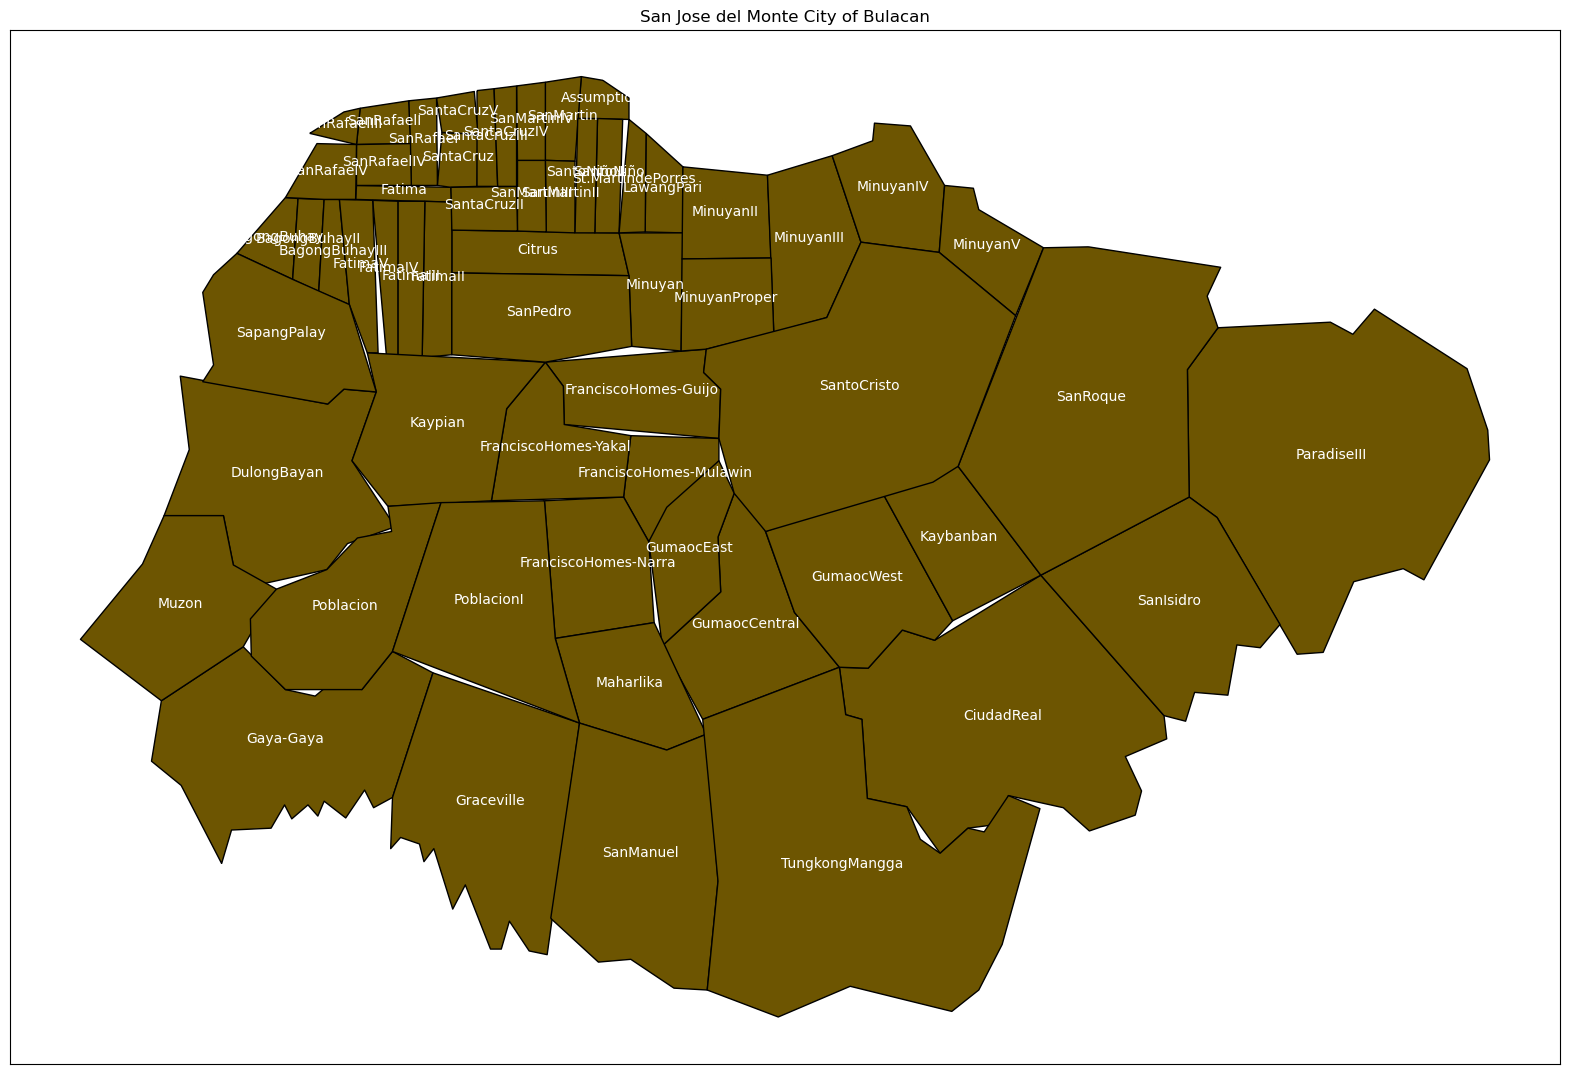

In [38]:
gdf3_R3.plot(figsize=(20,20), color='#6d5501', edgecolor='black')

for index, row in gdf3_R3.iterrows():
    plt.annotate(text=row['NAME_3'], xy=row['geometry'].centroid.coords[0],
                horizontalalignment='center', color='white')
                 
plt.xticks([])
plt.yticks([])

plt.title('San Jose del Monte City of Bulacan');

fl.fig_caption("San Jose del Monte City",
                "San Jose del Monte City with its municipalities and cities.")

**In Bulacan, it can be concluded that San Jose del Monte City has the highest total operating expenses, while Angat and Paombong have the lowest, respectively.**

[ref]: #top
[Back to Table of Contents][ref]

<a name="map3"></a>
## <span style="color:#235347;">Pampanga</span>
This section will provide visualizations of Pampanga and identify the place with the highest total operating expenses.


In [39]:
fl.table_caption("Pampanga (Region III)",
                 "Showing overview of the level 2 content of Pampanga.")

gdf2_CL = gdf_2[gdf_2['NAME_1'] == 'Pampanga']
gdf2_CL.head()

GID_2 GID_0      COUNTRY     GID_1    NAME_1 NL_NAME_1  \
1226  PHL.60.1_1   PHL  Philippines  PHL.60_1  Pampanga        NA   
1227  PHL.60.2_1   PHL  Philippines  PHL.60_1  Pampanga        NA   
1228  PHL.60.3_1   PHL  Philippines  PHL.60_1  Pampanga        NA   
1229  PHL.60.4_1   PHL  Philippines  PHL.60_1  Pampanga        NA   
1230  PHL.60.5_1   PHL  Philippines  PHL.60_1  Pampanga        NA   

           NAME_2 VARNAME_2 NL_NAME_2           TYPE_2     ENGTYPE_2   CC_2  \
1226  AngelesCity        NA        NA  Lungsod|Siyudad          City  35401   
1227       Apalit        NA        NA  Bayan|Munisipyo  Municipality  35402   
1228       Arayat        NA        NA  Bayan|Munisipyo  Municipality  35403   
1229      Bacolor        NA        NA  Bayan|Munisipyo  Municipality  35404   
1230      Candaba        NA        NA  Bayan|Munisipyo  Municipality  35405   

        HASC_2                                           geometry  
1226  PH.PM.AG  MULTIPOLYGON (((120.61460 15.10950, 120.60130 ...  
1227  PH.PM.AP  MULTIPOLYGON (((120.77590 14.92040, 120.75280 ...  
1228  PH.PM.AR  MULTIPOLYGON (((120.80410 15.12190, 120.79830 ...  
1229  PH.PM.BC  MULTIPOLYGON (((120.69560 14.97290, 120.68850 ...  
1230  PH.PM.CN  MULTIPOLYGON (((120.89640 15.00350, 120.89170 ...

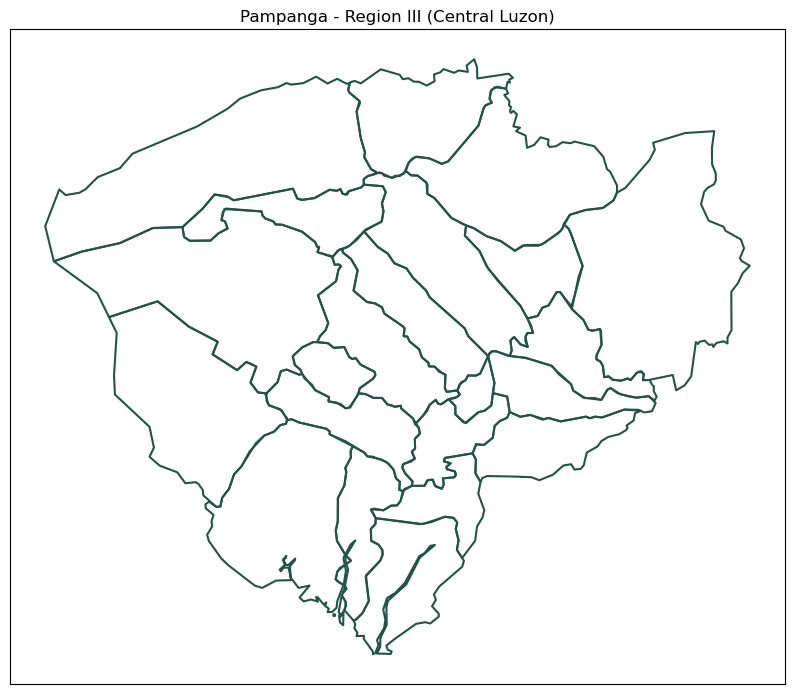

In [40]:
gdf2_CL.boundary.plot(figsize=(10,10), color='#235347')

plt.xticks([])
plt.yticks([])

plt.title('Pampanga - Region III (Central Luzon)');

fl.fig_caption("Pampanga",
                "Level 2 Map of Pampanga, Central Luzon (Region 3).")

In [41]:
finpop_CL = finpop[finpop['shp_province'] == 'Pampanga']

In [42]:
capex_muni = finpop_CL.sort_values(by="total_oper_expenses", ascending=False)

capex_muni.set_index('shp_municipality', inplace=True)

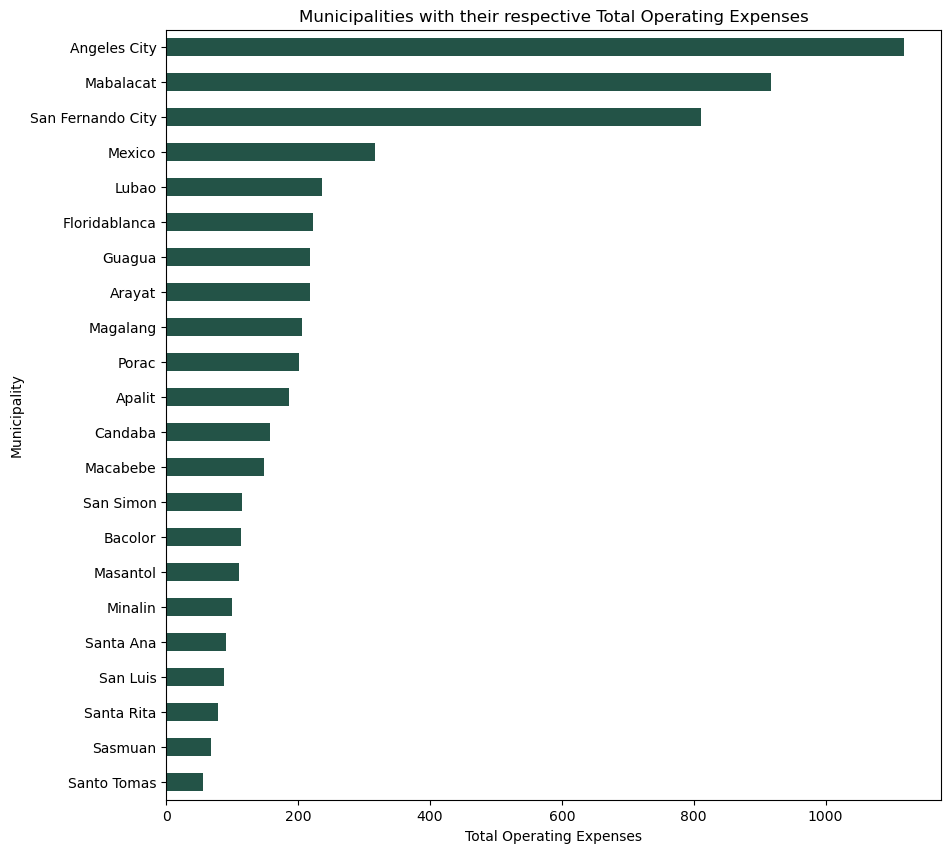

In [43]:
plt.figure(figsize=(10,10))
capex_muni['total_oper_expenses'].plot(kind='barh', color='#235347')
plt.title("Municipalities with their respective Total Operating Expenses")
plt.xlabel('Total Operating Expenses')
plt.ylabel('Municipality')
plt.gca().invert_yaxis()
plt.show()

fl.fig_caption("Municipalities of Pampanga",
                "The total operating expenses of Pampanga, including Angeles City, with the highest count.")

In [44]:
CL_data = gdf2_CL.merge(finpop_CL, left_on = ['NAME_2'], right_on = ['shp_municipality'])

In [45]:
gdf2_CL.shape[0] == finpop_CL.shape[0]

True

In [46]:
gdf2_CL.shape[0] == CL_data.shape[0]

False

In [47]:
finpop_CL_clean = finpop_CL.copy()

finpop_CL_clean['shp_municipality'] = finpop_CL_clean['shp_municipality'].str.replace(' ', '')

In [48]:
CL_data_clean = gdf2_CL.merge(finpop_CL_clean, left_on = ['NAME_2'], right_on = ['shp_municipality'])

In [49]:
gdf2_CL.shape[0] == CL_data_clean.shape[0]

True

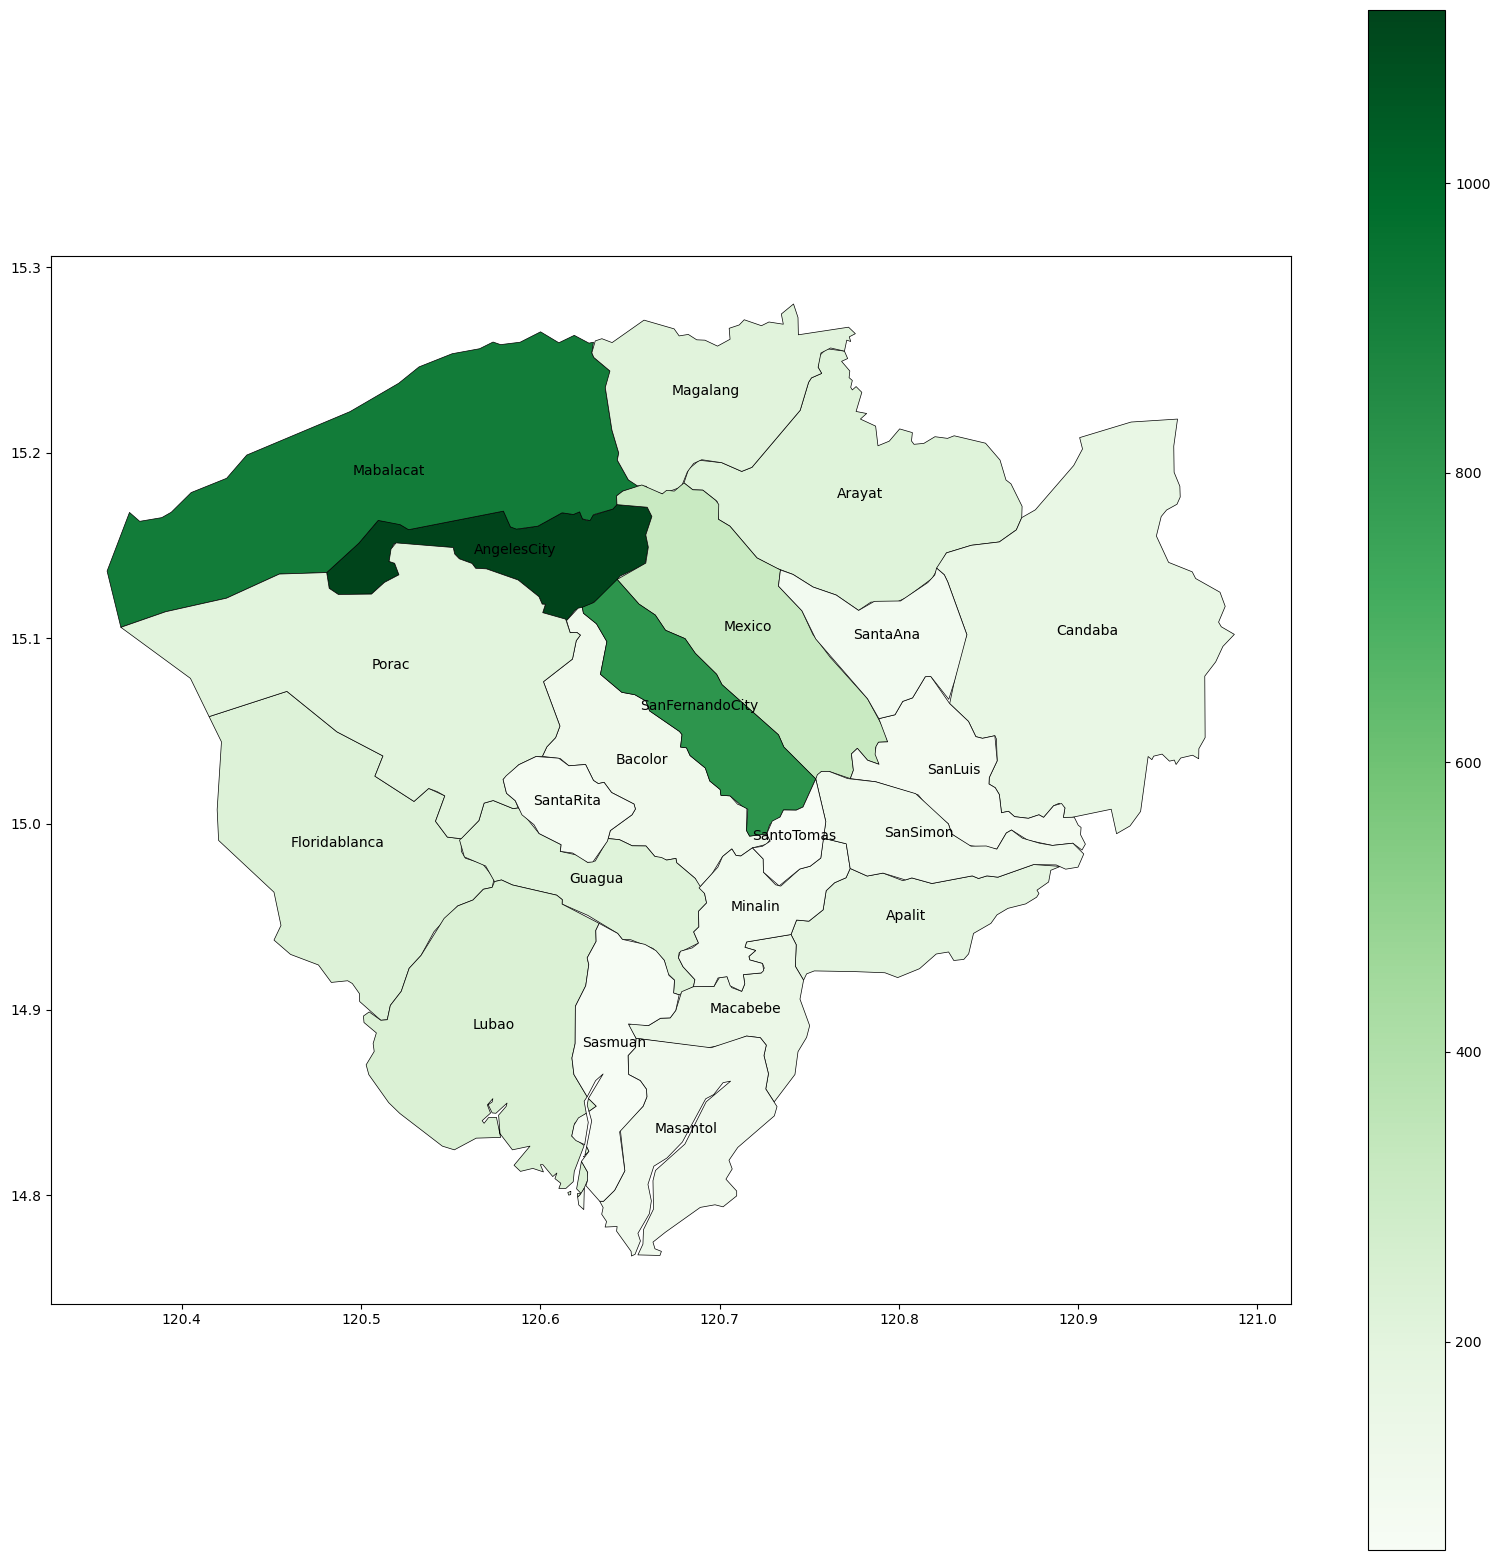

In [50]:
ax = CL_data_clean.plot(column='total_oper_expenses',
                         figsize=(20,20),
                         cmap='Greens',
                         legend=True,
                         edgecolor='black',
                         linewidth=0.5);
ax.grid(False)

for idx, row in CL_data_clean.iterrows():
    ax.annotate(text=row['shp_municipality'], xy=row['geometry'].centroid.coords[0],
                horizontalalignment='center', color='black')

fl.fig_caption("Pampanga and its TOE",
                "Displaying the places in Pampanga along with their corresponding levels of total operating expenditure.")

In [51]:
fl.table_caption("Angeles City",
                 "Angeles City of Pampanga (Region III) with the highest total operating expenses.")

gdf3_CL = gdf_3[gdf_3['NAME_2'] == 'AngelesCity']
gdf3_CL.head()

GID_3 GID_0      COUNTRY     GID_1    NAME_1 NL_NAME_1  \
31649  PHL.60.1.1_1   PHL  Philippines  PHL.60_1  Pampanga        NA   
31650  PHL.60.1.2_1   PHL  Philippines  PHL.60_1  Pampanga        NA   
31651  PHL.60.1.3_1   PHL  Philippines  PHL.60_1  Pampanga        NA   
31652  PHL.60.1.4_1   PHL  Philippines  PHL.60_1  Pampanga        NA   
31653  PHL.60.1.5_1   PHL  Philippines  PHL.60_1  Pampanga        NA   

            GID_2       NAME_2 NL_NAME_2             NAME_3 VARNAME_3  \
31649  PHL.60.1_1  AngelesCity        NA  AgapitodelRosario        NA   
31650  PHL.60.1_1  AngelesCity        NA              Amsic        NA   
31651  PHL.60.1_1  AngelesCity        NA             Anunas        NA   
31652  PHL.60.1_1  AngelesCity        NA           Balibago        NA   
31653  PHL.60.1_1  AngelesCity        NA             Capaya        NA   

      NL_NAME_3    TYPE_3 ENGTYPE_3 CC_3 HASC_3  \
31649        NA  Barangay   Village   NA     NA   
31650        NA  Barangay   Village   NA     NA   
31651        NA  Barangay   Village   NA     NA   
31652        NA  Barangay   Village   NA     NA   
31653        NA  Barangay   Village   NA     NA   

                                                geometry  
31649  MULTIPOLYGON (((120.60500 15.12540, 120.60320 ...  
31650  MULTIPOLYGON (((120.57950 15.14600, 120.57780 ...  
31651  MULTIPOLYGON (((120.57780 15.15240, 120.57950 ...  
31652  MULTIPOLYGON (((120.61290 15.14920, 120.60860 ...  
31653  MULTIPOLYGON (((120.64740 15.13530, 120.64510 ...

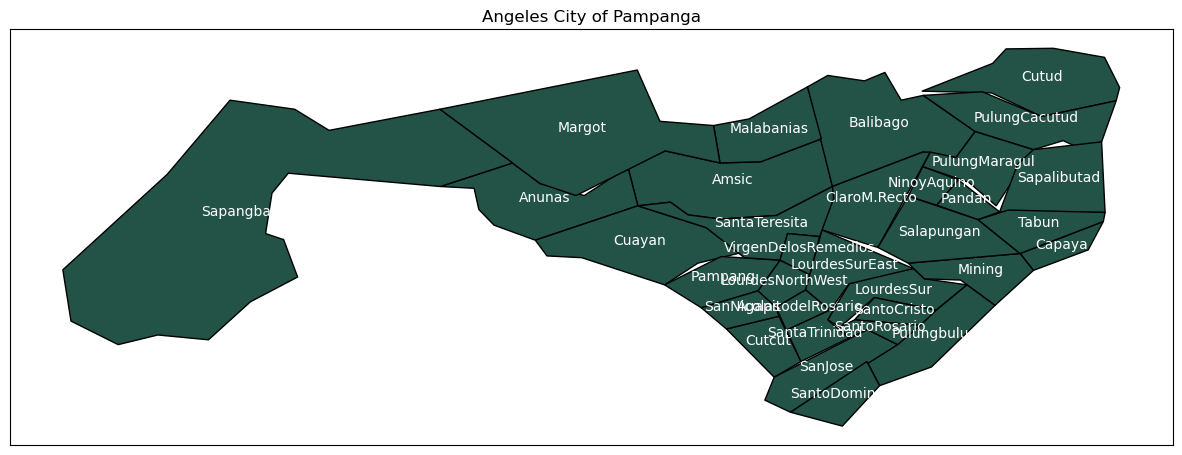

In [52]:
gdf3_CL.plot(figsize=(15,15), color='#235347', edgecolor='black')

for index, row in gdf3_CL.iterrows():
    plt.annotate(text=row['NAME_3'], xy=row['geometry'].centroid.coords[0],
                horizontalalignment='center', color='white')
                 
plt.xticks([])
plt.yticks([])

plt.title('Angeles City of Pampanga');

fl.fig_caption("Angeles City",
                "Angeles City with its municipalities and cities.")

**In Pampanga, it can be concluded that Angeles City has the highest total operating expenses, while Santo Tomas has the lowest.**

[ref]: #top
[Back to Table of Contents][ref]

<a name="map4"></a>
## <span style="color:#30106b;">Sorsogon</span>
This section will provide visualizations of Sorsogon and identify the place with the highest total operating expenses.


In [53]:
fl.table_caption("Sorsogon (Region V)",
                 "Showing overview of the level 2 content of Sorsogon.")

gdf2_R5 = gdf_2[gdf_2['NAME_1'] == 'Sorsogon']
gdf2_R5.head()

GID_2 GID_0      COUNTRY     GID_1    NAME_1 NL_NAME_1     NAME_2  \
1414  PHL.69.1_1   PHL  Philippines  PHL.69_1  Sorsogon        NA  Barcelona   
1415  PHL.69.2_1   PHL  Philippines  PHL.69_1  Sorsogon        NA      Bulan   
1416  PHL.69.3_1   PHL  Philippines  PHL.69_1  Sorsogon        NA    Bulusan   
1417  PHL.69.4_1   PHL  Philippines  PHL.69_1  Sorsogon        NA  Casiguran   
1418  PHL.69.5_1   PHL  Philippines  PHL.69_1  Sorsogon        NA   Castilla   

     VARNAME_2 NL_NAME_2           TYPE_2     ENGTYPE_2   CC_2    HASC_2  \
1414        NA        NA  Bayan|Munisipyo  Municipality  56202  PH.SR.BR   
1415        NA        NA  Bayan|Munisipyo  Municipality  56203  PH.SR.BU   
1416        NA        NA  Bayan|Munisipyo  Municipality  56204  PH.SR.BL   
1417        NA        NA  Bayan|Munisipyo  Municipality  56205  PH.SR.CS   
1418        NA        NA  Bayan|Munisipyo  Municipality  56206  PH.SR.CS   

                                               geometry  
1414  MULTIPOLYGON (((124.15420 12.81440, 124.15570 ...  
1415  MULTIPOLYGON (((123.97270 12.55960, 123.97060 ...  
1416  MULTIPOLYGON (((124.14170 12.70190, 124.14250 ...  
1417  MULTIPOLYGON (((124.01890 12.80710, 124.01380 ...  
1418  MULTIPOLYGON (((123.76360 12.83830, 123.76390 ...

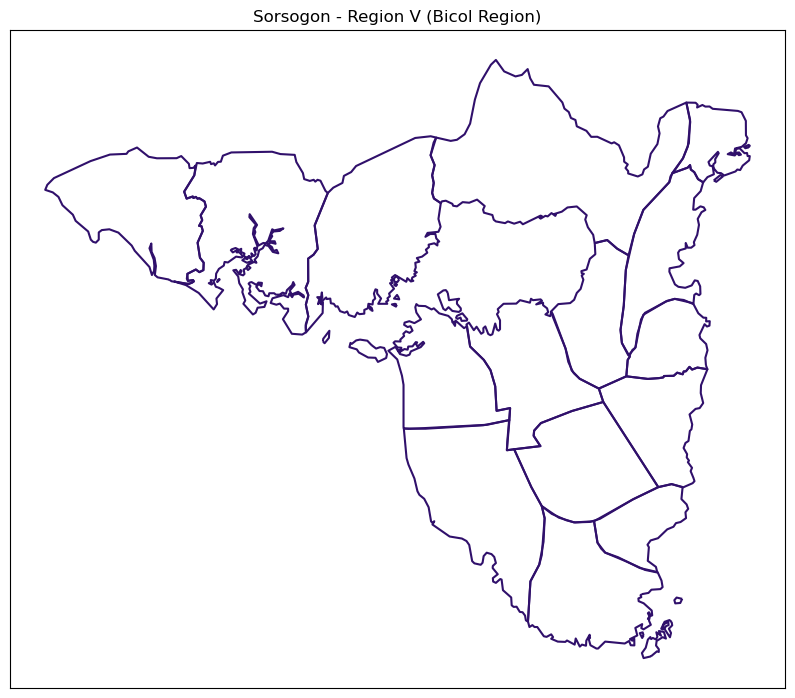

In [54]:
gdf2_R5.boundary.plot(figsize=(10,10), color='#30106b')

plt.xticks([])
plt.yticks([])

plt.title('Sorsogon - Region V (Bicol Region)');

fl.fig_caption("Sorsogon",
                "Level 2 Map of Sorsogon, Bicol Region (Region 5).")

In [55]:
finpop_R5 = finpop[finpop['shp_province'] == 'Sorsogon']

In [56]:
capex_muni = finpop_R5.sort_values(by="total_oper_expenses", ascending=False)

capex_muni.set_index('shp_municipality', inplace=True)

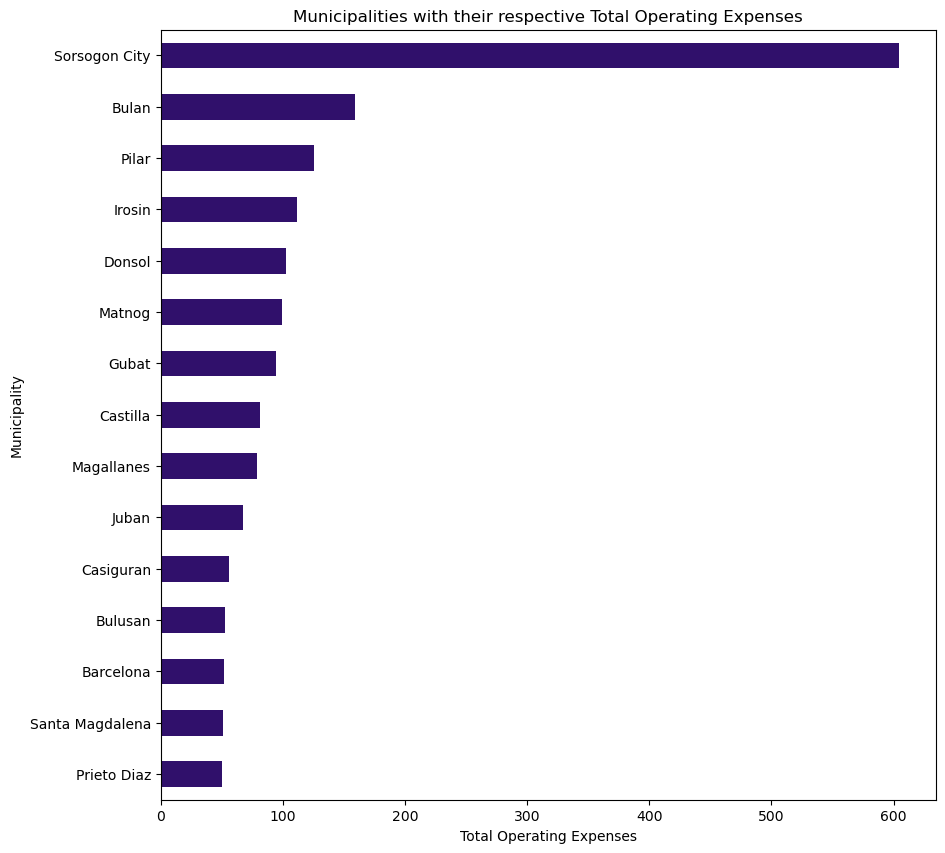

In [57]:
plt.figure(figsize=(10,10))
capex_muni['total_oper_expenses'].plot(kind='barh', color='#30106b')
plt.title("Municipalities with their respective Total Operating Expenses")
plt.xlabel('Total Operating Expenses')
plt.ylabel('Municipality')
plt.gca().invert_yaxis()
plt.show()

fl.fig_caption("Municipalities of Sorsogon",
                "The total operating expenses of Sorsogon, including Sorsogon City, with the highest count.")

In [58]:
R5_data = gdf2_R5.merge(finpop_R5, left_on = ['NAME_2'], right_on = ['shp_municipality'])

In [59]:
gdf2_R5.shape[0] == finpop_R5.shape[0]

True

In [60]:
gdf2_R5.shape[0] == R5_data.shape[0]

False

In [61]:
finpop_R5_clean = finpop_R5.copy()

finpop_R5_clean['shp_municipality'] = finpop_R5_clean['shp_municipality'].str.replace(' ', '')

In [62]:
R5_data_clean = gdf2_R5.merge(finpop_R5_clean, left_on = ['NAME_2'], right_on = ['shp_municipality'])

In [63]:
gdf2_R5.shape[0] == R5_data_clean.shape[0]

True

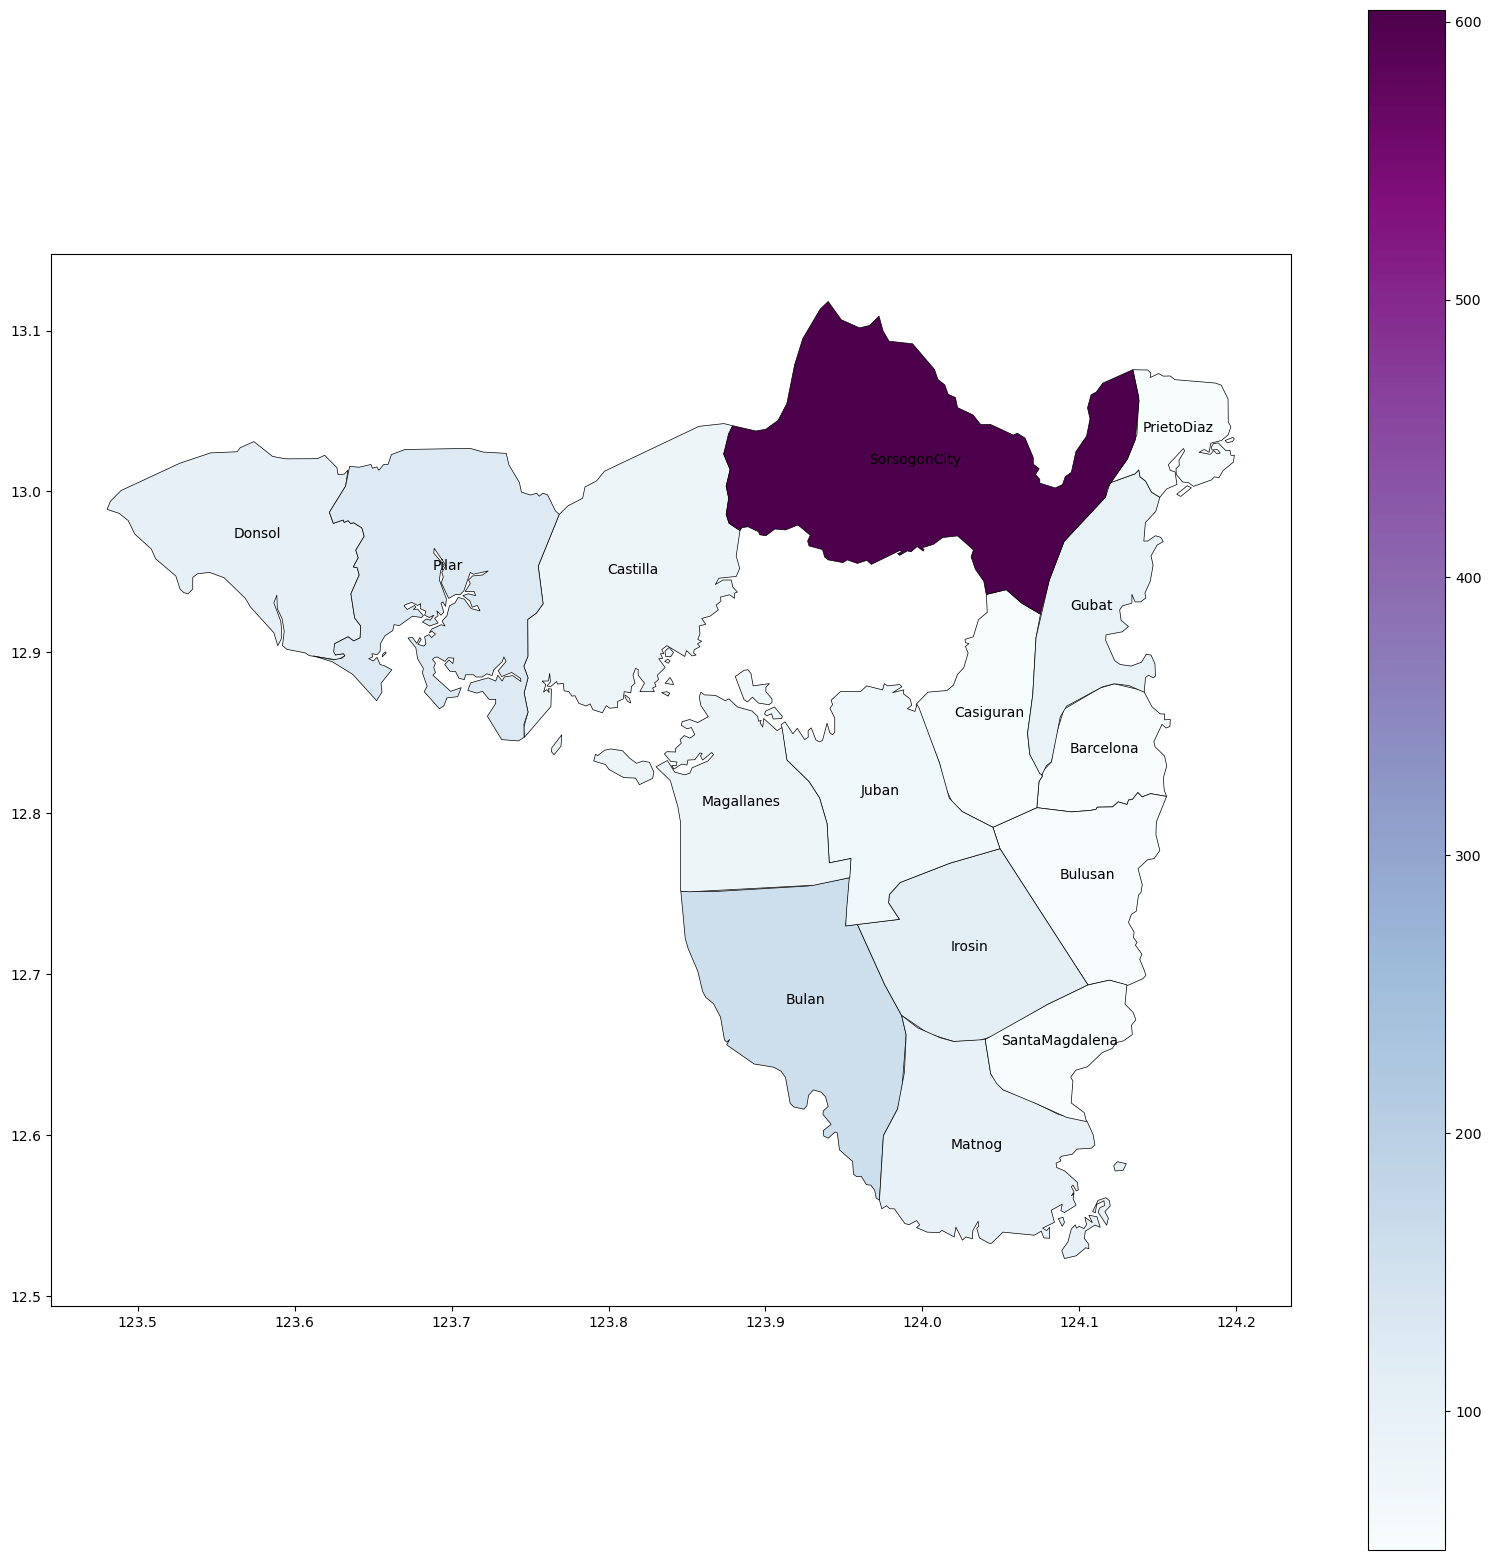

In [64]:
ax = R5_data_clean.plot(column='total_oper_expenses',
                         figsize=(20,20),
                         cmap='BuPu',
                         legend=True,
                         edgecolor='black',
                         linewidth=0.5);

for idx, row in R5_data_clean.iterrows():
    ax.annotate(text=row['shp_municipality'], xy=row['geometry'].centroid.coords[0],
                horizontalalignment='center', color='black')
    
fl.fig_caption("Sorsogon and its TOE",
                "Displaying the places in Sorsogon along with their corresponding levels of total operating expenditure.")

In [65]:
fl.table_caption("Sorsogon City",
                 "Sorsogon City of Bicol (Region V) with the highest total operating expenses.")

gdf3_R5 = gdf_3[gdf_3['NAME_2'] == 'SorsogonCity']
gdf3_R5.head()

GID_3 GID_0      COUNTRY     GID_1    NAME_1 NL_NAME_1  \
37038  PHL.69.15.1_1   PHL  Philippines  PHL.69_1  Sorsogon        NA   
37039  PHL.69.15.2_1   PHL  Philippines  PHL.69_1  Sorsogon        NA   
37040  PHL.69.15.3_1   PHL  Philippines  PHL.69_1  Sorsogon        NA   
37041  PHL.69.15.4_1   PHL  Philippines  PHL.69_1  Sorsogon        NA   
37042  PHL.69.15.5_1   PHL  Philippines  PHL.69_1  Sorsogon        NA   

             GID_2        NAME_2 NL_NAME_2           NAME_3  VARNAME_3  \
37038  PHL.69.15_1  SorsogonCity        NA           Abuyog         NA   
37039  PHL.69.15_1  SorsogonCity        NA  Almendras-Cogon  Poblacion   
37040  PHL.69.15_1  SorsogonCity        NA           Balete         NA   
37041  PHL.69.15_1  SorsogonCity        NA           Balogo         NA   
37042  PHL.69.15_1  SorsogonCity        NA    Balogo(Bacon)         NA   

      NL_NAME_3    TYPE_3 ENGTYPE_3 CC_3 HASC_3  \
37038        NA  Barangay   Village   NA     NA   
37039        NA  Barangay   Village   NA     NA   
37040        NA  Barangay   Village   NA     NA   
37041        NA  Barangay   Village   NA     NA   
37042        NA  Barangay   Village   NA     NA   

                                                geometry  
37038  MULTIPOLYGON (((124.05350 12.93900, 124.04080 ...  
37039  MULTIPOLYGON (((124.00890 12.97800, 124.01120 ...  
37040  MULTIPOLYGON (((124.02000 13.02300, 124.02330 ...  
37041  MULTIPOLYGON (((124.01180 12.97460, 124.00890 ...  
37042  MULTIPOLYGON (((124.13800 13.05870, 124.13810 ...

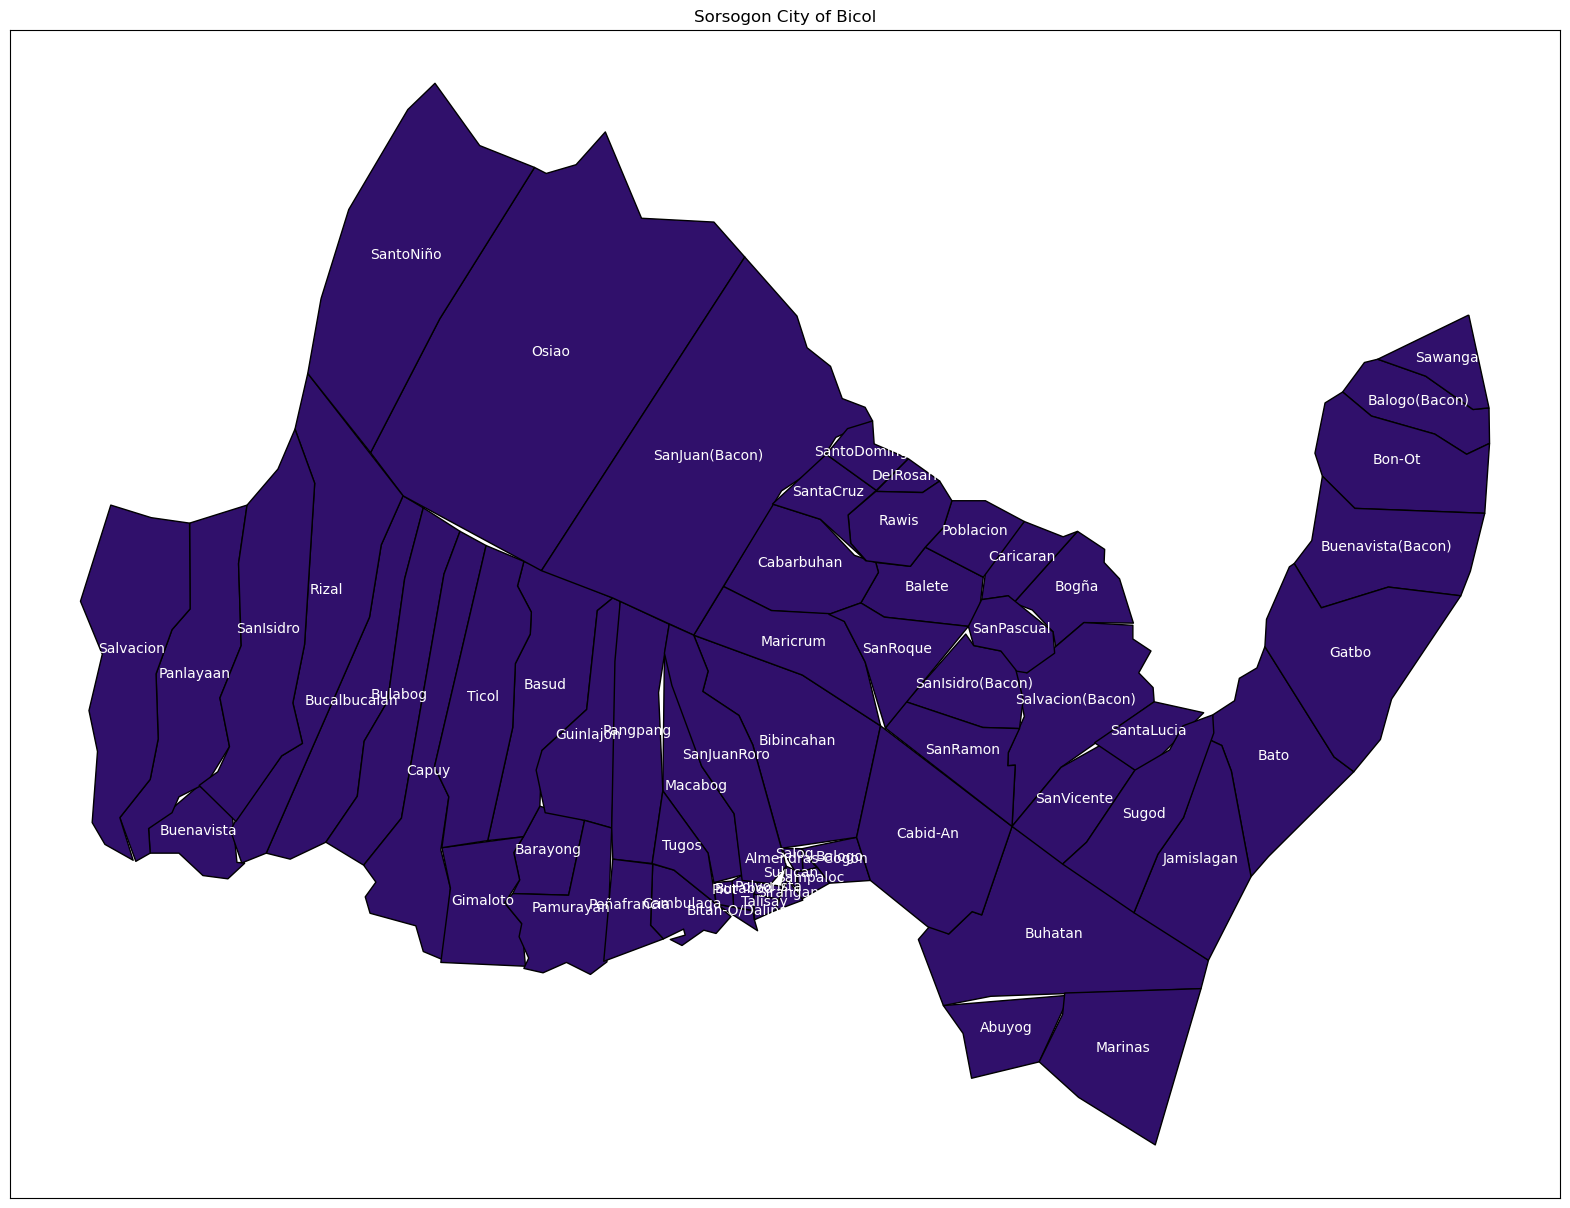

In [66]:
gdf3_R5.plot(figsize=(20,25), color='#30106b', edgecolor='black')

for index, row in gdf3_R5.iterrows():
    plt.annotate(text=row['NAME_3'], xy=row['geometry'].centroid.coords[0],
                horizontalalignment='center', color='white')
                 
plt.xticks([])
plt.yticks([])

plt.title('Sorsogon City of Bicol');

fl.fig_caption("Sorsogon City",
                "Sorsogon City with its municipalities and cities.")

**In Sorsogon, it can be concluded that Sorsogon City has the highest total operating expenses, while Prieto Diaz has the lowest.**

[ref]: #top
[Back to Table of Contents][ref]

<a name="map5"></a>
## <span style="color:#872657;">Benguet</span>
This section will provide visualizations of Benguet and identify the place with the highest total operating expenses.


In [67]:
fl.table_caption("Benguet (CAR)",
                 "Showing overview of the level 2 content of Benguet.")

gdf2_CAR = gdf_2[gdf_2['NAME_1'] == 'Benguet']
gdf2_CAR.head()

GID_2 GID_0      COUNTRY     GID_1   NAME_1 NL_NAME_1      NAME_2  \
187  PHL.13.1_1   PHL  Philippines  PHL.13_1  Benguet        NA        Atok   
188  PHL.13.2_1   PHL  Philippines  PHL.13_1  Benguet        NA  BaguioCity   
189  PHL.13.3_1   PHL  Philippines  PHL.13_1  Benguet        NA       Bakun   
190  PHL.13.4_1   PHL  Philippines  PHL.13_1  Benguet        NA       Bokod   
191  PHL.13.5_1   PHL  Philippines  PHL.13_1  Benguet        NA     Buguias   

    VARNAME_2 NL_NAME_2           TYPE_2     ENGTYPE_2    CC_2    HASC_2  \
187        NA        NA  Bayan|Munisipyo  Municipality  141101  PH.BG.AO   
188        NA        NA  Lungsod|Siyudad          City  141102  PH.BG.BG   
189        NA        NA  Bayan|Munisipyo  Municipality  141103  PH.BG.BK   
190        NA        NA  Bayan|Munisipyo  Municipality  141104  PH.BG.BO   
191        NA        NA  Bayan|Munisipyo  Municipality  141105  PH.BG.BU   

                                              geometry  
187  MULTIPOLYGON (((120.70880 16.54220, 120.70870 ...  
188  MULTIPOLYGON (((120.63110 16.38230, 120.62900 ...  
189  MULTIPOLYGON (((120.78680 16.77470, 120.80280 ...  
190  MULTIPOLYGON (((120.88380 16.50600, 120.89130 ...  
191  MULTIPOLYGON (((120.78130 16.71560, 120.79620 ...

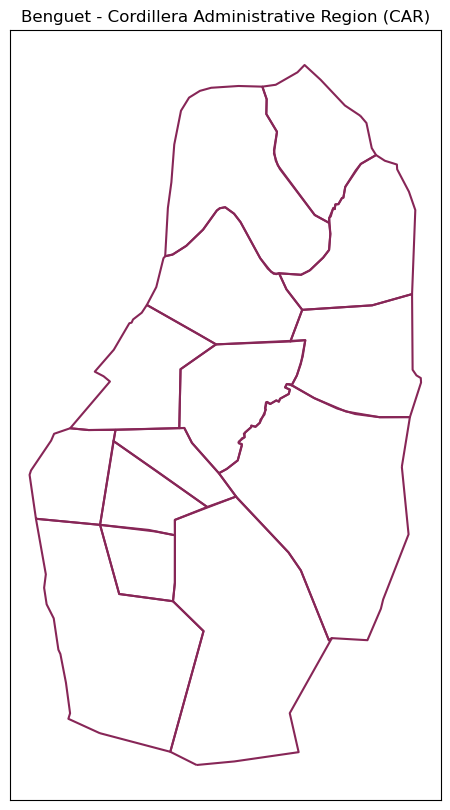

In [68]:
gdf2_CAR.boundary.plot(figsize=(10,10), color='#872657')

plt.xticks([])
plt.yticks([])

plt.title('Benguet - Cordillera Administrative Region (CAR)');

fl.fig_caption("Benguet",
                "Level 2 Map of Benguet, Cordillera Administrative Region (CAR).")

In [69]:
finpop_CAR = finpop[finpop['shp_province'] == 'Benguet']

In [70]:
capex_muni = finpop_CAR.sort_values(by="total_oper_expenses", ascending=False)

capex_muni.set_index('shp_municipality', inplace=True)

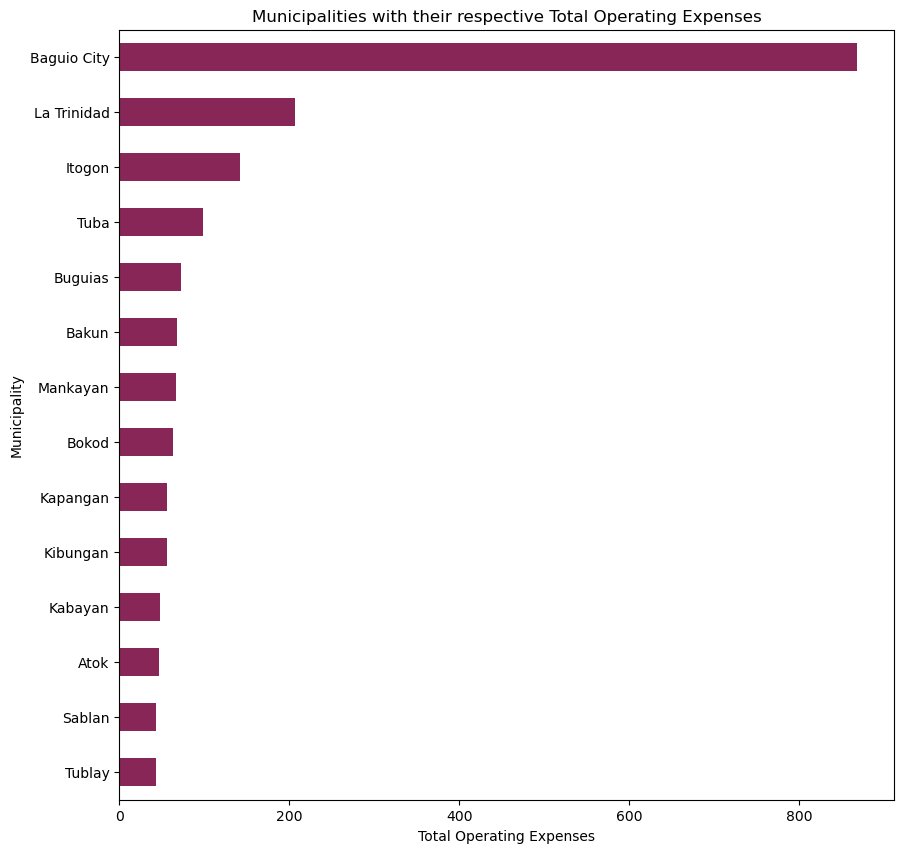

In [71]:
plt.figure(figsize=(10,10))
capex_muni['total_oper_expenses'].plot(kind='barh', color='#872657')
plt.title("Municipalities with their respective Total Operating Expenses")
plt.xlabel('Total Operating Expenses')
plt.ylabel('Municipality')
plt.gca().invert_yaxis()
plt.show()

fl.fig_caption("Municipalities of Benguet",
                "The total operating expenses of Benguet, including Baguio City, with the highest count.")

In [72]:
CAR_data = gdf2_CAR.merge(finpop_CAR, left_on = ['NAME_2'], right_on = ['shp_municipality'])

In [73]:
gdf2_CAR.shape[0] == finpop_CAR.shape[0]

True

In [74]:
gdf2_CAR.shape[0] == CAR_data.shape[0]

False

In [75]:
finpop_CAR_clean = finpop_CAR.copy()

finpop_CAR_clean['shp_municipality'] = finpop_CAR_clean['shp_municipality'].str.replace(' ', '')

In [76]:
CAR_data_clean = gdf2_CAR.merge(finpop_CAR_clean, left_on = ['NAME_2'], right_on = ['shp_municipality'])

In [77]:
gdf2_R7.shape[0] == R7_data_clean.shape[0]

True

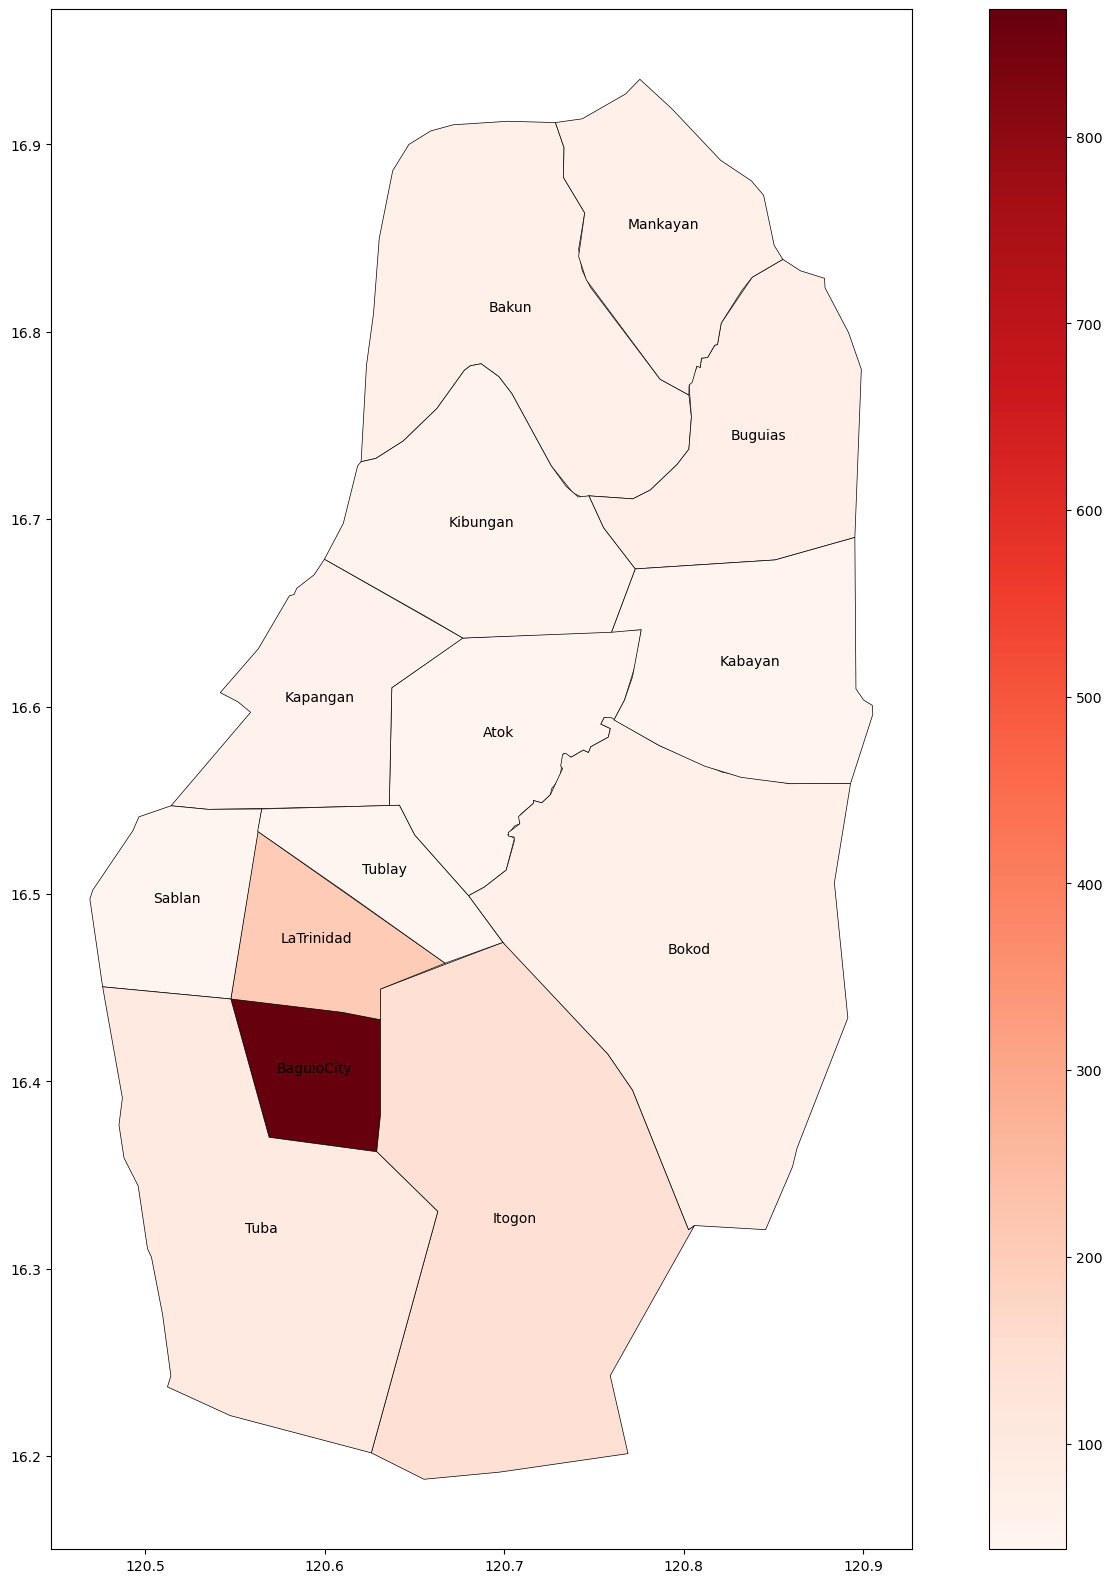

In [78]:
ax = CAR_data_clean.plot(column='total_oper_expenses',
                         figsize=(20,20),
                         cmap='Reds',
                         legend=True,
                         edgecolor='black',
                         linewidth=0.5);

for idx, row in CAR_data_clean.iterrows():
    ax.annotate(text=row['shp_municipality'], xy=row['geometry'].centroid.coords[0],
                horizontalalignment='center', color='black')
    
fl.fig_caption("Benguet and its TOE",
                "Displaying the places in Benguet along with their corresponding levels of total operating expenditure.")

In [79]:
fl.table_caption("Baguio City",
                 "Baguio City of Benguet (CAR) with the highest total operating expenses.")

gdf3_CAR = gdf_3[gdf_3['NAME_2'] == 'BaguioCity']
gdf3_CAR.head()

GID_3 GID_0      COUNTRY     GID_1   NAME_1 NL_NAME_1  \
4393  PHL.13.2.1_1   PHL  Philippines  PHL.13_1  Benguet        NA   
4394  PHL.13.2.2_1   PHL  Philippines  PHL.13_1  Benguet        NA   
4395  PHL.13.2.3_1   PHL  Philippines  PHL.13_1  Benguet        NA   
4396  PHL.13.2.4_1   PHL  Philippines  PHL.13_1  Benguet        NA   
4397  PHL.13.2.5_1   PHL  Philippines  PHL.13_1  Benguet        NA   

           GID_2      NAME_2 NL_NAME_2                            NAME_3  \
4393  PHL.13.2_1  BaguioCity        NA       A.Bonifacio-Caguioa-Rimando   
4394  PHL.13.2_1  BaguioCity        NA  Abanao-Zandueta-Kayong-Chugum-Ot   
4395  PHL.13.2_1  BaguioCity        NA                     AlfonsoTabora   
4396  PHL.13.2_1  BaguioCity        NA                           Ambiong   
4397  PHL.13.2_1  BaguioCity        NA                   AndresBonifacio   

          VARNAME_3 NL_NAME_3    TYPE_3 ENGTYPE_3 CC_3 HASC_3  \
4393           ABCR        NA  Barangay   Village   NA     NA   
4394          AZKCO        NA  Barangay   Village   NA     NA   
4395             NA        NA  Barangay   Village   NA     NA   
4396             NA        NA  Barangay   Village   NA     NA   
4397  LowerBokawkan        NA  Barangay   Village   NA     NA   

                                               geometry  
4393  MULTIPOLYGON (((120.60110 16.42300, 120.59970 ...  
4394  MULTIPOLYGON (((120.59590 16.42050, 120.59570 ...  
4395  MULTIPOLYGON (((120.60170 16.42770, 120.60020 ...  
4396  MULTIPOLYGON (((120.61430 16.43300, 120.60680 ...  
4397  MULTIPOLYGON (((120.59000 16.42370, 120.58730 ...

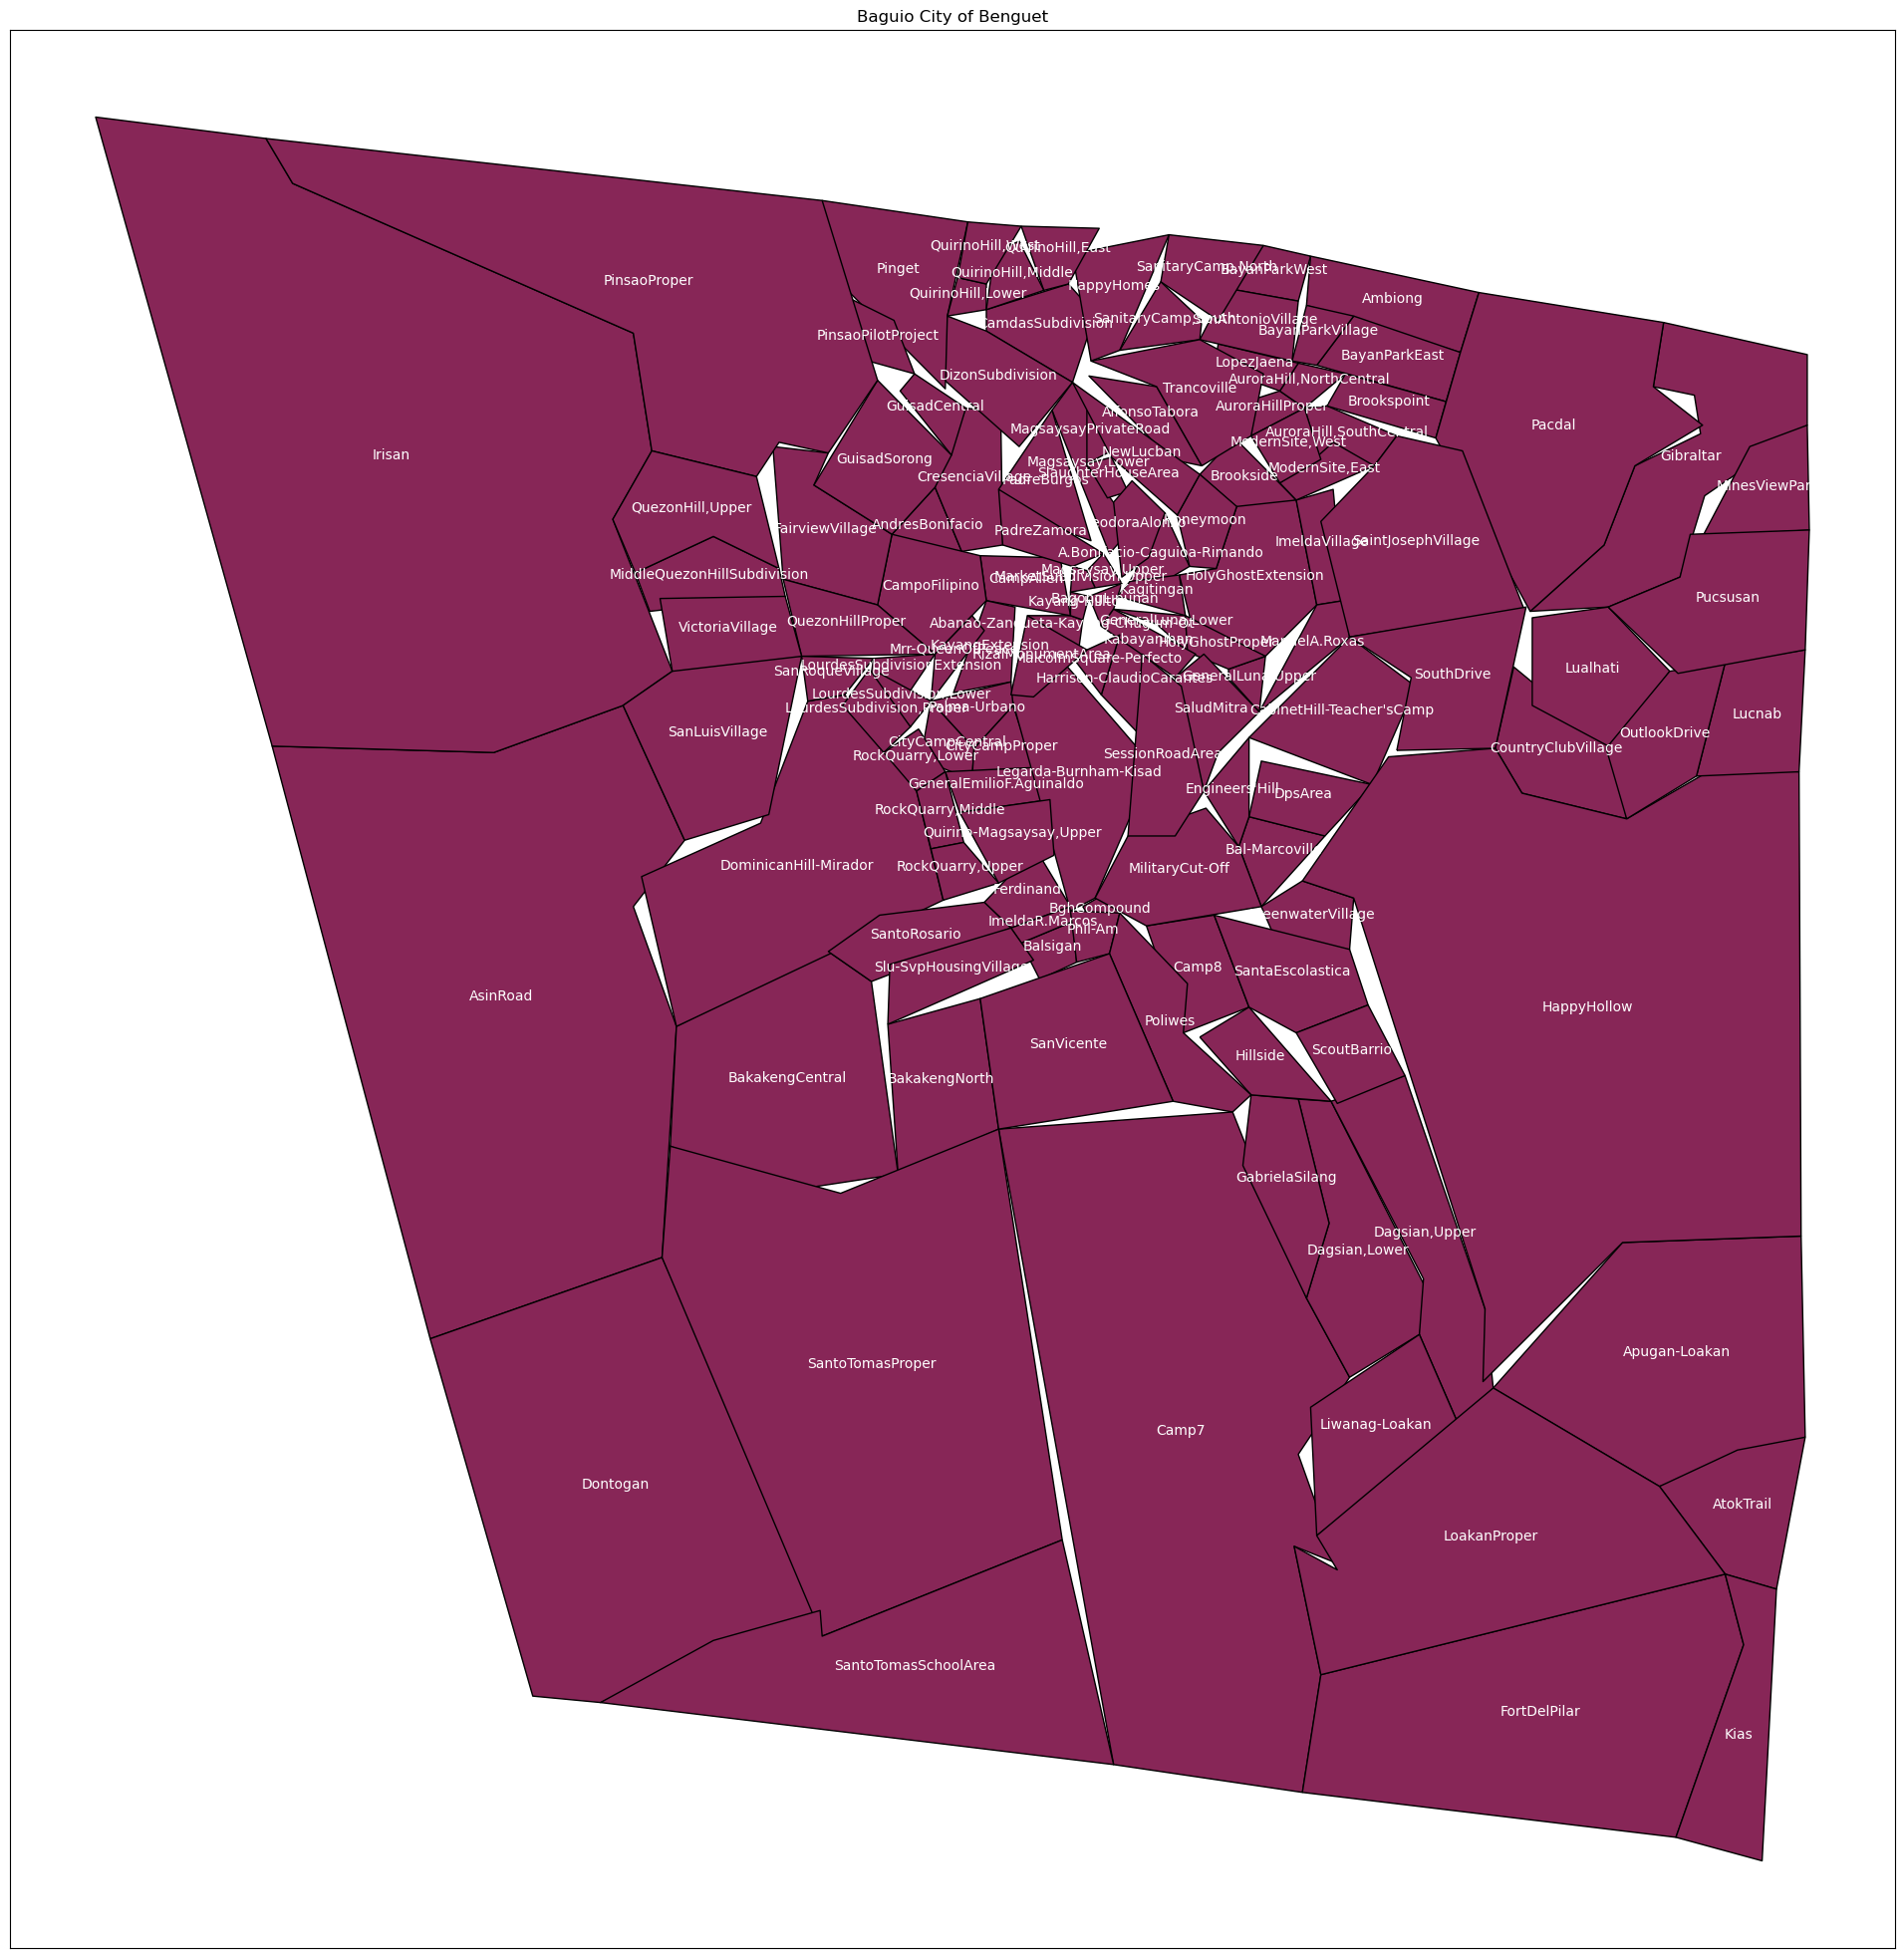

In [80]:
gdf3_CAR.plot(figsize=(25,25), color='#872657', edgecolor='black')

for index, row in gdf3_CAR.iterrows():
    plt.annotate(text=row['NAME_3'], xy=row['geometry'].centroid.coords[0],
                horizontalalignment='center', color='white')
                 
plt.xticks([])
plt.yticks([])

plt.title('Baguio City of Benguet');

fl.fig_caption("Baguio City",
                "Baguio City with its municipalities and cities.")

**In Benguet, it can be concluded that Baguio City has the highest total operating expenses, while Sablan and Tublay have the lowest, respectively.**

[ref]: #top
[Back to Table of Contents][ref]

<a name="conclusion"></a>
# Conclusion
This section will provide the conclusion drawn from all visualizations of the selected places, based on their highest total operating expenses.
***

In conclusion, after analyzing the total operating expenditure data for Bohol, Bulacan, Pampanga, Sorsogon, and Benguet, the following observations can be made:

In Bohol, **Tagbilaran City** has the highest total operating expenses, signaling significant economic activity, while *Batuan* shows comparatively lower expenses, suggesting opportunities for cost optimization or investment diversification. In Bulacan, **San Jose del Monte City** leads in total operating expenses, possibly reflecting a thriving business environment, while *Angat and Paombong* exhibit lower expenses, indicating areas that may benefit from business development initiatives or infrastructure investments to stimulate economic growth.

In Pampanga, **Angeles City** leads in total operating expenses, suggesting a robust business ecosystem, while *Santo Tomas* displays lower expenses, indicating opportunities for enhancing business competitiveness. In Sorsogon, **Sorsogon City** emerges as the leader in total operating expenses, presenting a focal point for economic development, while *Prieto Diaz* indicates potential areas for growth. Lastly, **Baguio City** in Benguet showcases the highest total operating expenses, highlighting its significance as an economic center and tourist destination, while *Sablan and Tublay* offer potential for economic diversification and resilience.

[ref]: #top
[Back to Table of Contents][ref]

***
***